## imports


In [179]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import arc as arc
from matplotlib import gridspec
import scipy.signal
%config Completer.use_jedi = False
import sympy as sp
delta = sp.KroneckerDelta
import numpy as np 
from sympy.physics.quantum.cg import CG
from mpl_toolkits.mplot3d import Axes3D
from numpy import array as arr
import pandas as pd
import plotly.offline as pltly
pltly.init_notebook_mode(connected=True)
from plotly import graph_objs as go
import math
import scipy.optimize as opt
from scipy import ndimage
import scipy.constants as scc
from scipy.integrate import odeint, solve_ivp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import warnings 
warnings.filterwarnings('module')
from datetime import datetime
import uncertainties.unumpy
import IPython
import pandas as pd
import pickle
from matplotlib.ticker import ScalarFormatter
from matplotlib.pyplot import *
from matplotlib import rcParams
from matplotlib import style
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (25.0, 8.0)
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.formatter.useoffset'] = False
mpl.rcParams['grid.alpha'] = 0.15
mpl.rcParams['axes.formatter.limits'] = (-3,3)
mpl.rcParams['image.cmap'] = 'viridis'
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
viridis = cm.get_cmap('viridis', 256)
dark_viridis = []
bl = 0.15
for i in range(256):
    dark_viridis.append(list(viridis(i)))
    dark_viridis[-1][0] = dark_viridis[-1][0] *(bl+(1-bl)*i/255)
    dark_viridis[-1][1] = dark_viridis[-1][1] *(bl+(1-bl)*i/255)
    dark_viridis[-1][2] = dark_viridis[-1][2] *(bl+(1-bl)*i/255)
dark_viridis_cmap = ListedColormap(dark_viridis)
import mpl_toolkits.axes_grid1
import matplotlib.gridspec as gridspec
from skimage.transform import iradon
from tqdm import tqdm
from importlib import reload
import sys
sys.path.append("..")
import Analysis_Python_Files.CollisionalAnalysis as lac
import Analysis_Python_Files.Constants as cs

### paper length calc

In [4]:
width = 510
aspect_fig1 = 1.5
aspect_fig2 = 1
aspect_fig3 = 2
aspect_fig4 = 1.5
single = 150
double = 300

def single_word(aspect):
    return 150/aspect+20

def double_word(aspect):
    return 300/(0.5*aspect)+40

total_image_word = single_word(aspect_fig1)+single_word(aspect_fig2)+double_word(aspect_fig3)+single_word(aspect_fig4)
print(total_image_word)

750.0


### saturation intensity

In [1077]:

atom = arc.Rubidium87()

ground_f2 = {'ng':5,'lg':0,'jg':0.5,'fg':2}
ground_f1 = {'ng':5,'lg':0,'jg':0.5,'fg':1}
excited_d1_f2={'ne':5,'le':1,'je':0.5,'fe':2}
excited_d1_f1={'ne':5,'le':1,'je':0.5,'fe':1}
excited_d2_f3={'ne':5,'le':1,'je':1.5,'fe':3}
excited_d2_f2={'ne':5,'le':1,'je':1.5,'fe':2}
atom.getSaturationIntensity(**ground_f2,**excited_d1_f2,mfg=2,mfe=2)/10 # mW/cm^2
atom.getSaturationIntensity(**ground_f2,**excited_d2_f3,mfg=2,mfe=3)/10

atom.getSaturationIntensity(**ground_f2,**excited_d1_f2,mfg=2,mfe=1)/10,\
atom.getSaturationIntensity(**ground_f1,**excited_d1_f2,mfg=1,mfe=2)/10,\
atom.getSaturationIntensity(**ground_f2,**excited_d1_f1,mfg=2,mfe=1)/10,\
atom.getSaturationIntensity(**ground_f2,**excited_d2_f2,mfg=2,mfe=2)/10,\
atom.getSaturationIntensity(**ground_f1,**excited_d2_f2,mfg=1,mfe=2)/10

(8.971631509596579,
 2.9905438365321926,
 2.9905438365321926,
 5.007425148007146,
 3.3382834320047627)

In [1078]:
ground_f2 = {'ng':5,'lg':0,'jg':0.5,'fg':2}
ground_f1 = {'ng':5,'lg':0,'jg':0.5,'fg':1}
excited_d1_f2={'ne':5,'le':1,'je':0.5,'fe':2}
excited_d1_f1={'ne':5,'le':1,'je':0.5,'fe':1}
excited_d2_f3={'ne':5,'le':1,'je':1.5,'fe':3}
excited_d2_f2={'ne':5,'le':1,'je':1.5,'fe':2}


atom.getSaturationIntensity(**ground_f1,**excited_d2_f2,mfg=1,mfe=2)/10,\
atom.getSaturationIntensity(**ground_f1,**excited_d1_f2,mfg=1,mfe=2)/10

(3.3382834320047627, 2.9905438365321926)

## Velocity of atoms for given temp 

the one-axis velocity distribution is a gaussian with sigma $\sigma_{v}=\sqrt{k_BT/m}$

In [13]:
T = 7e-6
v_atom = np.sqrt(cs.k_B * T/cs.Rb87_M)
print(v_atom, 'm/s')

0.025878152175713678 m/s


## Ballistic expansion calculation

$\sigma_x(t)=\sqrt{\frac{2 E_{\mathrm{KE}}}{m} t_f^2+\sigma_x(0)^2}$

In [47]:
def E(v):
    return 1/8 * cs.Rb87_M*v**2

Eke = E(0.010714572933528252)
print(Eke,'J')

2.0709732e-30 J


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

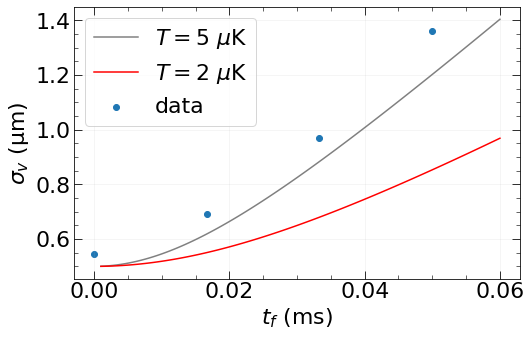

In [30]:
def sigma_x(E_KE, t_f, sigma_x_0):
    return np.sqrt((2 * E_KE/cs.Rb87_M) * t_f**2 + sigma_x_0**2)

tf = np.linspace(0.001e-3,0.06e-3,100)
sigma_0 = 0.50e-6
T4= 5e-6
T8 = 2e-6
eke4 = 1/2*cs.k_B*T4
eke8 = 1/2*cs.k_B*T8

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(tf*1e3,sigma_x(eke4,tf,sigma_0)*1e6,label=r'$T=5 \ \mu$K ',color = 'grey')
ax.plot(tf*1e3,sigma_x(eke8,tf,sigma_0)*1e6,label=r'$T=2 \ \mu$K ',color = 'red')
# 
# ax.plot(tf*1e3,sigma_x(eke,tf,sigma_0)*1e6,label='theory',color = 'grey')

ax.set_xlabel(r'$ t_f \ \mathrm{(ms)}$')
ax.set_ylabel(r'$ \sigma_v \ \mathrm{(\mu m)} $')

data = [(0.000,.545),(0.0167,0.692),(.0333,.97),(.05,1.36)]

# Extract the x and y values into separate lists
x = [d[0] for d in data]
y = [d[1] for d in data]

# Plot the data as a scatterplot
plt.scatter(x, y,label = 'data')

# ax.set_title('expansion waist of atom in 24 uK trap')
# ax.grid(color='lightgray', linestyle='-', linewidth=0.5)
plt.legend(loc='upper left')
plt.tight_layout

## rotational energy splittings calculation

rotational energy is given by $\frac{\hbar^2 \ell (\ell+1)}{2I}$. $I=\sum mr^2$, so for a homonuclear molecule, it's $I=2m(r/2)^2 = mr^2/2$, so $\frac{\hbar^2\ell(\ell+1)}{mr^2}$

In [17]:
def rEnergy(rv,ell):
    return mc.hbar**2*ell*(ell+1)/(mc.Rb87_M*rv**2)

molecules are generally colliding on the order of 50nm distance apart, with 10-100$\mu K$

In [18]:
rvals = np.linspace(10e-9,50e-9,100)
splittings = []
statenums = []
for rval in rvals:
    rEnergyVals = []
    for ellVal in np.arange(100):
        rEnergyVals = np.append(rEnergyVals, rEnergy(rval,ellVal)/mc.h/1e6)
    closestState = np.argmin(abs(rEnergyVals - 4))
    statenums.append(closestState)
    splittings.append(rEnergyVals[closestState+1]-rEnergyVals[closestState])

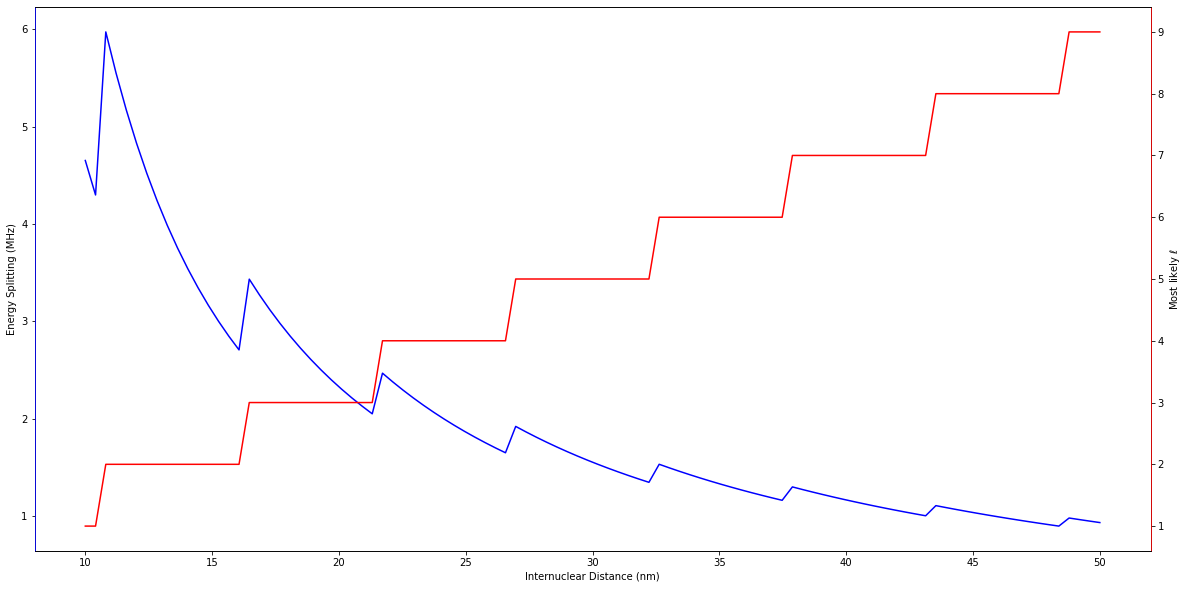

In [19]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(rvals*1e9,splittings,'-b')
ax.set_ylabel('Energy Splitting (MHz)')
ax2 = ax.twinx()
ax2.plot(rvals*1e9, statenums,color='r')
ax2.spines['right'].set_color('r')
ax2.spines['left'].set_color('b')
ax.set_xlabel('Internuclear Distance (nm)')
ax2.set_ylabel('Most likely $\ell$')
# fig.savefig('Rotational_Energy_Separation.png', dpi=400)

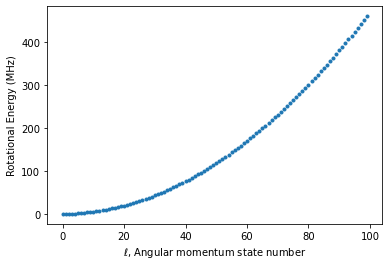

In [20]:
plt.plot( rEnergyVals,'.')
plt.ylabel( 'Rotational Energy (MHz)');
plt.xlabel( '$\ell$, Angular momentum state number');
#plt.axhline(4)
#plt.axhline(2)
#plt.axhline(0.2)


In [17]:
m = mc.Rb87_M
v = np.sqrt(2*1.32e-26/mc.Rb87_M)
vMicro = v*1e3
t = 20e-6
x = v*t
print(vMicro)
print(x)

427.70526454241264
8.554105290848253e-06


## single atom heating loss

In [26]:
# intensity on atom (units in mm)

f_col = 15.29 # focal length of collimating lens  c260=15.29    c280=18.4   
fiber_NA = 0.092 # nominal fiber numerical aperture
beam_radius = f_col*fiber_NA/10
beam_radius # collimated beam radius
beam_power = 2.500 # mW
intensity = beam_power/(np.pi*beam_radius**2)
print("intensity =",intensity*10, "mW/cm^2")

intensity = 402.1605910175146 mW/cm^2


In [27]:
# constants
photonEnergyEv = 1.559 # transition energy in ev - Steck
photonEnergeJoules = photonEnergyEv/6.242e18
KelvinToEv = 8.61732814974493E-05
KelvinToJoules = 1.380648780669e-23
lifetime = 27.7e-9 # s to p d1 lifetime (s)

# parameters
survivalDecay = 1 # per ms
pulseLength = 1/survivalDecay # ms
cyclesPerPulse = pulseLength*1e-3/lifetime # s
initialAtomTemp = 4e-6 # K
trapDepth = 24e-6 # K
deltaT = trapDepth-initialAtomTemp # K
tempGainPerCycle = deltaT/cyclesPerPulse #K
energyGainPerCycle = tempGainPerCycle*KelvinToEv
totalEnergyReleased = cyclesPerPulse*photonEnergyEv
fractionGained = energyGainPerCycle/totalEnergyReleased
k_L = 795e-9/(2*np.pi)

print('pulse length for single atom loss = ', pulseLength,'ms')
print('cycles Per Pulse =',cyclesPerPulse)
print('temp increase per cycle = ', tempGainPerCycle,'K')
print('energy increase per cycle  =',energyGainPerCycle, 'eV')
print('fraction of E_tot  =',fractionGained)

pulse length for single atom loss =  1.0 ms
cycles Per Pulse = 36101.08303249098
temp increase per cycle =  5.54e-10 K
energy increase per cycle  = 4.7739997949586917e-14 eV
fraction of E_tot  = 8.482347294442319e-19


## phonon number and atom temp calculation

average phonon number: $ \ \ \ \bar{n}=\frac{1}{\exp \left(\frac{\hbar \omega_r}{k_b T}\right)-1}  $

Atom temperature:$ \ \ \ \ T =  \frac{\hbar \omega_r}{k_b} \mathrm{ln} \left(\frac{1}{\bar{n}} +1\right)^{-1} $

radial trap frequency: $ \ \ \ \ \ \omega_r=\left(\frac{4 U}{m w_0^2}\right)^{1 / 2} \ \  \ \ \ \omega_0 = 700 \  \mathrm{nm} \ \ \  $ (tweezer waist)

$ T = 15 \  \mathrm{\mu K}$ when $U = 1  \ \mathrm{mK} $  <br>


$\rightarrow \bar{n} = 1.76 $

At 24 $\mathrm{\mu K}, \ \ \  T = 2.32 \  \mathrm{\mu K}  $ 

In [2]:
def atom_temp(trap_depth):
    KelvinToJoules = 1.380648780669e-23
    w_0 = 0.7e-6 # beam waist (radius)
    T_1mK = 15e-6 # atom temp in 1 mK trap
    U = trap_depth*KelvinToJoules # depth in Joules
    U_1mK = 1e-3*KelvinToJoules # depth in Joules
    wr_1mK = np.sqrt(4*U_1mK/(mc.Rb87_M*w_0**2)) # Hz
    w_r = np.sqrt(4*U/(mc.Rb87_M*w_0**2)) # Hz
    nbar = 1/(np.exp(mc.hbar*wr_1mK/(mc.k_B*T_1mK))-1)
    T = mc.hbar*w_r/mc.k_B *1/(np.log(1/nbar+1))
    print('T =',T,'radial trap freq = ',w_r/(2*np.pi)) 
    

In [43]:
def T_radial_nbar(radial_freq,nbar_r):
    w_r = 2*np.pi*radial_freq
    # w_a = 2*np.pi*axial_freq
    T_r = cs.hbar*w_r/cs.k_B *1/(np.log(1/nbar_r+1))
    # T_a = cs.hbar*w_a/cs.k_B *1/(np.log(1/nbar_a+1))
    print('radial T =',round(T_r*1e6,2),'uK')
    # print('axial T =',round(T_a*1e6,2),'uK')
    

In [48]:
atom_temp_nbar(140e3,30e3,2.28,7)

radial T = 18.48 uK
axial T = 10.78 uK


In [153]:
T_1mK = 15e-6 # atom temp in 1 mK trap
U_1mK = 1.2e-3*KelvinToJoules # 
U_11uK = 11e-6*KelvinToJoules # K (TOF depth)
U_halfmK = 0.5e-3*KelvinToJoules # K (TOF depth)
U_1point12mK = 1.12e-3*KelvinToJoules # K (TOF depth)
w_0 = 0.7e-6 # beam waist (radius)
wr_11uK = np.sqrt(4*U_11uK/(mc.Rb87_M*w_0**2)) # Hz
wr_1mK = np.sqrt(4*U_1mK/(mc.Rb87_M*w_0**2)) # Hz
wa_1mK = np.sqrt(2*U_1mK/(mc.Rb87_M*w_0**2)) # Hz
print('trap freq at 0.85 mK (Hz):',wr_1mK/(2*np.pi))


trap freq at 0.85 mK (Hz): 154073.14571582078 108946.16613439994


In [62]:
nbar = 1/(np.exp(mc.hbar*wr_1mK/(mc.k_B*T_1mK))-1)
nbar2 = 1/(np.exp(mc.hbar*(wa_1mK/2*np.pi)/(mc.k_B*T_1mK))-1)
print('nbar axial = ',nbar1)

NameError: name 'nbar1' is not defined

In [9]:
ray = np.pi*w_0**2/(850e-9)
wa_1mK = np.sqrt(2*U_1mK/(mc.Rb87_M*ray**2))
print(wa_1mK/(2*np.pi))

38440.7933191914


In [61]:
wr_11uK = np.sqrt(4*U_11uK/(mc.Rb87_M*w_0**2)) # Hz
wr_halfmK = np.sqrt(4*U_halfmK/(mc.Rb87_M*w_0**2)) # Hz
wr_1point12mK = np.sqrt(4*U_1point12mK/(mc.Rb87_M*w_0**2)) # Hz
T_11uK = mc.hbar*wr_11uK/mc.k_B *1/(np.log(1/nbar+1))
T_halfmK = mc.hbar*wr_halfmK/mc.k_B *1/(np.log(1/nbar+1))
T_1point12mK = mc.hbar*wr_1point12mK/mc.k_B *1/(np.log(1/nbar+1))
print('temperature at 24 uK =',T_24uK)
print('temperature at 0.5 mK =',T_halfmK)
print('temperature at 1.12 mK =',T_1point12mK)

temperature at 24 uK = 1.2624381172952598e-05
temperature at 0.5 mK = 9.682458365518545e-06
temperature at 1.12 mK = 1.449137674618944e-05


In [21]:
lmbda = 850e-9
k = 2*np.pi/ lmbda
delta_k =k/np.sqrt(2)
x_0_r = (mc.hbar/(2*mc.Rb87_M*wr_1mK))**(1/2)
x_0_a = (mc.hbar/(2*mc.Rb87_M*wa_1mK))**(1/2)
eta_r = delta_k*x_0_r
eta_a = delta_k*x_0_a
print('Lamb-Dicke radial',eta_r)
print('Lamb-Dicke axial',eta_a)


Lamb-Dicke radial 0.10628049234296305
Lamb-Dicke axial 0.20329446291506392


In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the differential equation for projectile motion under gravity
def diff_eq_gravity(t, state, g):
    # state is a vector [y, v_y], where y is the position and v_y is the velocity in the y-direction
    dydt = state[1]  # velocity
    dv_ydt = -g  # acceleration due to gravity
    return [dydt, dv_ydt]

# Function to calculate trajectory using solve_ivp
def calculate_trajectory_gravity(initial_velocity, launch_angle, num_steps, time_end):
    # Convert launch angle from degrees to radians
    launch_angle_rad = np.radians(launch_angle)
    
    # Initial position and velocity
    initial_position = [0, 0]  # starting at y=0
    initial_velocity = initial_velocity * np.array([np.cos(launch_angle_rad), np.sin(launch_angle_rad)])
    
    # Define time points for which to solve the differential equation
    t_span = (0, time_end)
    t_eval = np.linspace(0, time_end, num_steps)
    
    # Solve the differential equation using solve_ivp
    solution = solve_ivp(diff_eq_gravity, t_span, [initial_position[1], initial_velocity[1]], t_eval=t_eval, args=(9.81,))
    
    return solution.t, solution.y[0]  # return time points and y position

# Function to plot the trajectory
def plot_trajectory(time, position_y):
    plt.plot(time, position_y)
    plt.title('Vertical Position of Ball vs Time')
    plt.xlabel('Time (s)')
    plt.ylabel('Vertical Position (m)')
    plt.grid(True)
    plt.show()

# Parameters
initial_velocity = 20  # m/s
launch_angle = 45  # degrees
num_steps = 1000
time_end = 3  # seconds

# Calculate trajectory
time, position_y = calculate_trajectory_gravity(initial_velocity, launch_angle, num_steps, time_end)

# Plot trajectory
plot_trajectory(time, position_y)


# kinetic energy release in light assisted collisions

This model treats the collisions in one dimension by fixing one atom in space and solving for the motion of the other atom as it experiences the repulsive potential from the resonant dipole interaction. 


$ T=\frac{1}{2} m \dot{r}^2 \quad U= \pm \frac{C_3}{r^3} \ \ \  \mathcal{L}=\frac{1}{2} m \dot{r}^2+\frac{C_3}{r^3} $


$\frac{d}{d t}\left(\frac{\partial \mathcal{L}}{\partial \dot{r}}\right)-\frac{\partial \mathcal{L}}{\partial r}=0 \ \ 
\rightarrow \quad \ddot{r}= \mp \frac{3 C_3}{mr^4}$

Using $v=\sqrt{k_BT/m} \rightarrow T = \frac{mv^2}{ k_b}$, and $E = \frac{1}{2} k_b T$, we get $E= \frac{1}{2}mv^2$

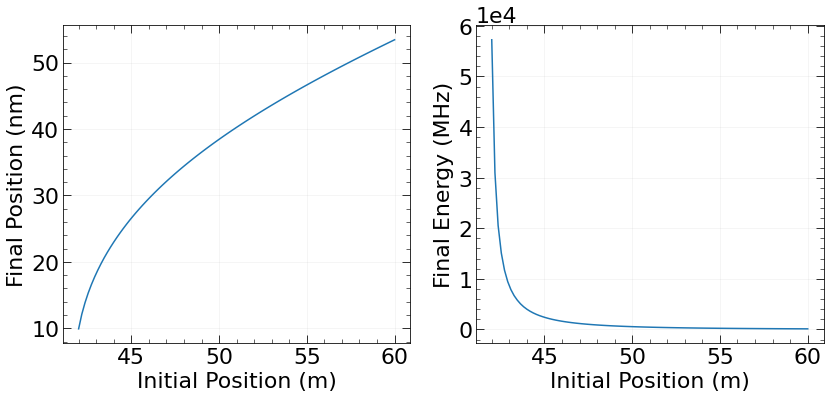

In [267]:
import numpy as np
import matplotlib.pyplot as plt

# Define your constants like cs.Rb87_C3, cs.Rb87_M, and cs.hbar

def diff_eq_collision(t, r, C3_factor):
    drdt = np.zeros(2)
    drdt[0] = r[1]
    drdt[1] = C3_factor * 3 * cs.Rb87_C3 / (cs.Rb87_M * r[0]**4)
    return drdt

def collision(R, V, dt, C3_factor):
    r0 = [R, -V]
    t_span = [0, dt]
    sol = solve_ivp(lambda t, r: diff_eq_collision(t, r, C3_factor), t_span, r0, t_eval=np.linspace(0, dt, 1000))
    positions = sol.y[0]
    velocities = sol.y[1]
    E_final_MHz = 1 / 2 * cs.Rb87_M * velocities[-1]**2 / cs.hbar * 1e-6
    return positions[-1]*1e9, E_final_MHz

# Initial velocity and time duration
V = 0.1
dt = 27e-9
C3_factor = -1
# List of initial positions to plot
R_values = np.linspace(42e-9, 60e-9, 100)

# Calculate final positions and energies using list comprehension
final_positions, final_energies = zip(*[collision(R, V, dt, C3_factor) for R in R_values])

# Plotting
plt.figure(figsize=(12, 6))

# Final position vs initial position
plt.subplot(1, 2, 1)
plt.plot(R_values*1e9, final_positions, linestyle='-')
plt.xlabel('Initial Position (m)')
plt.ylabel('Final Position (nm)')
# plt.title('Final Position vs Initial Position')
plt.grid(True)

# Final energy vs initial position
plt.subplot(1, 2, 2)
plt.plot(R_values*1e9, final_energies, linestyle='-')
plt.xlabel('Initial Position (m)')
plt.ylabel('Final Energy (MHz)')
# plt.title('Final Energy vs Initial Position')
plt.grid(True)

plt.tight_layout()
plt.show()


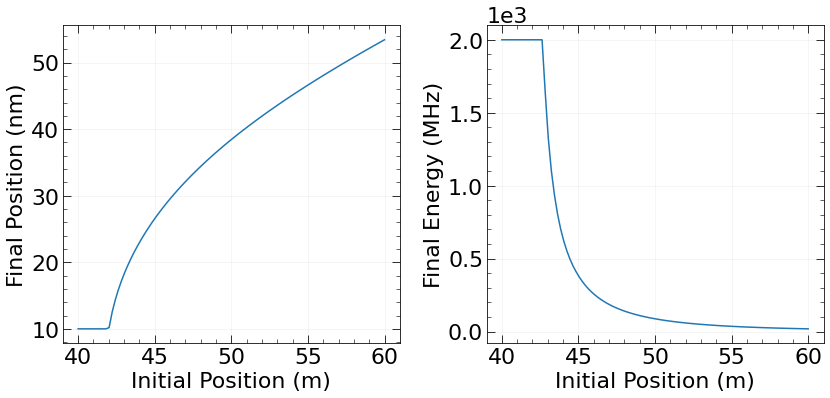

In [268]:
def collision(R, V, dt, C3_factor):
    r0 = [R, -V]
    t_span = [0, dt]
    sol = solve_ivp(lambda t, r: diff_eq_collision(t, r, C3_factor), t_span, r0, t_eval=np.linspace(0, dt, 1000))
    
    positions = sol.y[0]
    velocities = sol.y[1]
    
    # Calculate the final position
    final_position = positions[-1]
    
    # Check if the final position is less than 10 nm and adjust if necessary
    if final_position < 10e-9:
        final_position = 10e-9
    
    # Calculate the final energy
    E_final_MHz = 1 / 2 * cs.Rb87_M * velocities[-1]**2 / cs.h * 1e-6
    
    # Check if the final energy exceeds the maximum energy threshold and adjust if necessary
    if E_final_MHz > 2000:
        E_final_MHz = 2000
    
    return final_position*1e9, E_final_MHz



V = 0.1
dt = 27e-9
C3_factor = -1
# List of initial positions to plot
R_values = np.linspace(40e-9, 60e-9, 100)

# Calculate final positions and energies using list comprehension
final_positions, final_energies = zip(*[collision(R, V, dt, C3_factor) for R in R_values])

# Plotting
plt.figure(figsize=(12, 6))

# Final position vs initial position
plt.subplot(1, 2, 1)
plt.plot(R_values*1e9, final_positions, linestyle='-')
plt.xlabel('Initial Position (m)')
plt.ylabel('Final Position (nm)')
# plt.title('Final Position vs Initial Position')
plt.grid(True)

# Final energy vs initial position
plt.subplot(1, 2, 2)
plt.plot(R_values*1e9, final_energies, linestyle='-')
plt.xlabel('Initial Position (m)')
plt.ylabel('Final Energy (MHz)')
# plt.title('Final Energy vs Initial Position')
plt.grid(True)

plt.tight_layout()
plt.show()

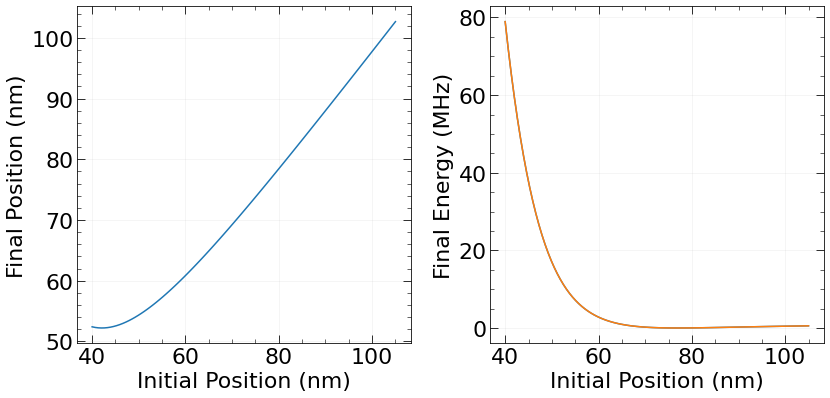

In [269]:
# Define the function for the differential equation
def diff_eq_collision(t, r, C3_factor):
    drdt = np.zeros(2)
    drdt[0] = r[1]
    drdt[1] = C3_factor * 3 * cs.Rb87_C3 / (cs.Rb87_M * r[0]**4)
    return drdt

# Define the function to solve the differential equation
def collision(R, V, dt, C3_factor):
    r0 = [R, -V]
    t_span = [0, dt]
    # Use a smaller step size for better accuracy near R=40 nm
    sol = solve_ivp(lambda t, r: diff_eq_collision(t, r, C3_factor), t_span, r0, t_eval=np.linspace(0, dt, 1000))
    positions = sol.y[0]
    velocities = sol.y[1]
    E_final_MHz = 1/2 * cs.Rb87_M * velocities[-1]**2 / cs.h * 1e-6
    return positions[-1]*1e9, E_final_MHz

# Initial velocity and time duration
V = 0.1
dt = 27e-9
C3_factor = 1

# List of initial positions to plot
R_values = np.linspace(40e-9, 105e-9, 100)

# Calculate final positions and energies using list comprehension
final_positions, final_energies = zip(*[collision(R, V, dt, C3_factor) for R in R_values])

# Plotting
plt.figure(figsize=(12, 6))

# Final position vs initial position
plt.subplot(1, 2, 1)
plt.plot(R_values*1e9, final_positions, linestyle='-')
plt.xlabel('Initial Position (nm)')
plt.ylabel('Final Position (nm)')
plt.grid(True)

# Final energy vs initial position
plt.subplot(1, 2, 2)
plt.plot(R_values*1e9, final_energies, linestyle='-')
plt.plot(R_values*1e9, final_energies, linestyle='-')

plt.xlabel('Initial Position (nm)')
plt.ylabel('Final Energy (MHz)')
plt.grid(True)

plt.tight_layout()
plt.show()


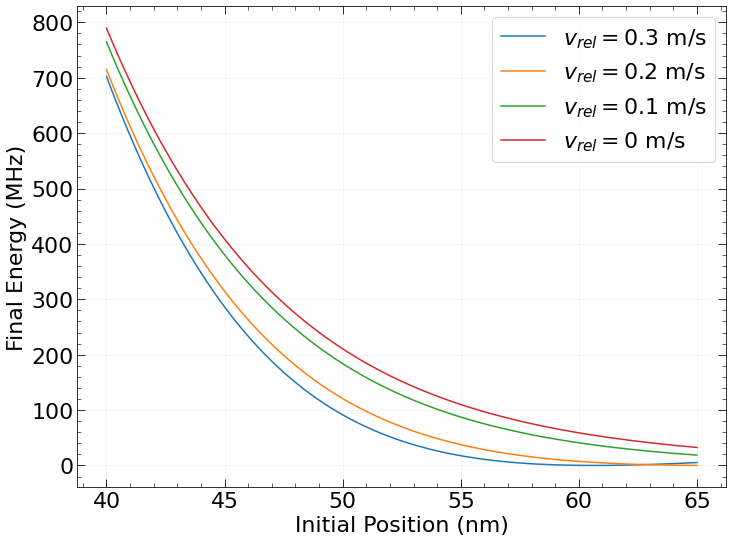

In [150]:
# Define the function for the differential equation
def diff_eq_collision(t, r, C3_factor):
    drdt = np.zeros(2)
    drdt[0] = r[1]
    drdt[1] = C3_factor * 3 * cs.Rb87_C3 / (cs.Rb87_M * r[0]**4) 
    return drdt

# Define the function to solve the differential equation
def collision(R, V, dt, C3_factor):
    r0 = [R, -V]
    t_span = [0, dt]
    # Use a smaller step size for better accuracy near R=40 nm
    sol = solve_ivp(lambda t, r: diff_eq_collision(t, r, C3_factor), t_span, r0, t_eval=np.linspace(0, dt, 1000))
    positions = sol.y[0]
    velocities = sol.y[1]
    E_final_MHz = 3 / 4 * cs.Rb87_M * velocities[-1]**2 / cs.hbar * 1e-6
    return positions[-1]*1e9, E_final_MHz


# def diff_eq_collisionLZ(t, r, C3_factor):
#     drdt = np.zeros(2)
#     drdt[0] = r[1]
#     drdt[1] = C3_factor * 3 * cs.Rb87_C3 / (cs.Rb87_M * r[0]**4)
#     return drdt

# def get_collisional_energyLZ(R, V, C3_factor):
#     dt = 27e-9
#     r0 = [R, -V]
#     t_span = [0, dt]
#     sol = solve_ivp(lambda t, r: diff_eq_collisionLZ(t, r, C3_factor), t_span, r0, t_eval=np.linspace(0, dt, 1000))
#     velocities = sol.y[1]
#     E_final_MHz = 3 / 8 * cs.Rb87_M * velocities[-1]**2 / cs.hbar * 1e-6
#     return E_final_MHz 

# Initial velocity and time duration
V1 = 0.05
V0 = 0
V2 = .2
V3 = 0.3
dt = 27e-9
C3_factor = 1

# List of initial positions to plot
R_values = np.linspace(40e-9, 65e-9, 100)

# Calculate final positions and energies using list comprehension
final_positions_v1, final_energies_v1 = zip(*[collision(R, V1, dt, C3_factor) for R in R_values])
final_positions_v0, final_energies_v0 = zip(*[collision(R, V0, dt, C3_factor) for R in R_values])
final_positions_v2, final_energies_v2 = zip(*[collision(R, V2, dt, C3_factor) for R in R_values])
final_positions_v3, final_energies_v3 = zip(*[collision(R, V3, dt, C3_factor) for R in R_values])

# Plotting
plt.figure(figsize=(20, 8))

# Final energy vs initial position
plt.subplot(1, 2, 2)
plt.plot(R_values*1e9, final_energies_v3, linestyle='-',label = r'$v_{rel}= 0.3$ m/s')


plt.plot(R_values*1e9, final_energies_v2, linestyle='-',label = r'$v_{rel}= 0.2$ m/s')

plt.plot(R_values*1e9, final_energies_v1, linestyle='-',label = r'$v_{rel}=0.1$ m/s')
plt.plot(R_values*1e9, final_energies_v0, linestyle='-',label = r'$v_{rel}=0$ m/s')

plt.xlabel('Initial Position (nm)')
plt.ylabel('Final Energy (MHz)')
plt.grid(True)
plt.legend(loc=1)
plt.tight_layout()
plt.show()


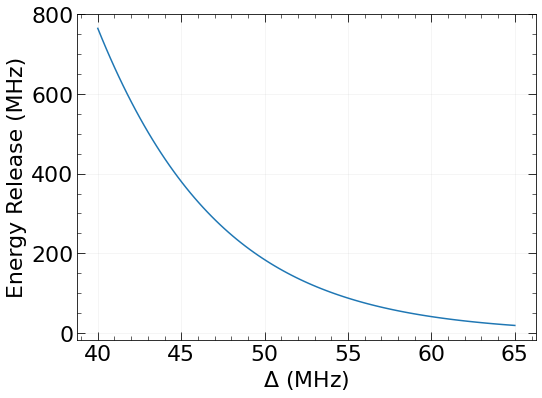

In [167]:
# Define the function for the differential equation
def diff_eq_collision(t, r, C3_factor):
    drdt = np.zeros(2)
    drdt[0] = r[1]
    drdt[1] = C3_factor * 3 * cs.Rb87_C3 / (cs.Rb87_M * r[0]**4) 
    return drdt

# Define the function to solve the differential equation
def collision(R, V, dt, C3_factor):
    r0 = [R, -V]
    t_span = [0, dt]
    # Use a smaller step size for better accuracy near R=40 nm
    sol = solve_ivp(lambda t, r: diff_eq_collision(t, r, C3_factor), t_span, r0, t_eval=np.linspace(0, dt, 1000))
    positions = sol.y[0]
    velocities = sol.y[1]
    E_final_MHz = 3 / 4 * cs.Rb87_M * velocities[-1]**2 / cs.hbar * 1e-6
    return positions[-1]*1e9, E_final_MHz

# Initial velocity and time duration
V1 = 0.05
V0 = 0
V2 = .2
V3 = 0.3
dt = 27e-9
C3_factor = 1

# List of initial positions to plot
R_values = np.linspace(40e-9, 65e-9, 100)

# Calculate final positions and energies using list comprehension
final_positions_v1, final_energies_v1 = zip(*[collision(R, V1, dt, C3_factor) for R in R_values])
final_positions_v0, final_energies_v0 = zip(*[collision(R, V0, dt, C3_factor) for R in R_values])
final_positions_v2, final_energies_v2 = zip(*[collision(R, V2, dt, C3_factor) for R in R_values])
final_positions_v3, final_energies_v3 = zip(*[collision(R, V3, dt, C3_factor) for R in R_values])

# Plotting
plt.figure(figsize=(8,6))

# Final energy vs initial position

def R_to_Delta(R):
    return cs.Rb87_C3/(cs.hbar*R**3)


# plt.plot(R_to_Delta(R_values)*1e-6, np.array(final_energies_v1), linestyle='-',label = r'$v_{rel}=0.1$ m/s')
plt.plot(R_values*1e9, final_energies_v1, linestyle='-',label = r'$v_{rel}=0.1$ m/s')


plt.xlabel(r'$\Delta$ (MHz)')
plt.ylabel('Energy Release (MHz)')
plt.grid(True)
# plt.legend(loc=1)
plt.tight_layout()
plt.show()


In [193]:
reload(lac)

<module 'Analysis_Python_Files.CollisionalAnalysis' from '/Users/stevenpampel/Documents/B232_Data_Analysis/Molecular_Potentials/../Analysis_Python_Files/CollisionalAnalysis.py'>

In [249]:
potentials = 'C3_over2.csv'
delta_min = .13
delta_max = .15
delta_step = .03
intersections_data = lac.get_intersections(potentials, delta_min, delta_max, delta_step)
# print(intersections_data.keys())
print(intersections_data)

potential = 'C3_over2.csv'
target_distance = 3.2556750736328307e-08
target_energy = 0.1
v_rel = 0.1
dist, nearest_potential, slope_parameter,sym_label = lac.get_slope_parameter(potential, target_distance, target_energy,plot=False)
Ef = lac.get_collisional_energy(dist,nearest_potential,target_distance, v_rel,'energy')

print('E =', Ef,'MHz',sym_label)


{0.13: [3.2556750736328307e-08]}
E = 805.8238568081624 MHz energy


In [218]:
detuning 

[0.01, 0.04, 0.06999999999999999, 0.09999999999999999, 0.13, 0.16, 0.19]

In [223]:
Egain

[3.63243752099801,
 22.64609536160512,
 149.3348747038197,
 368.17598391925725,
 643.0772104028941,
 946.6302649413865,
 1262.8015872272429]

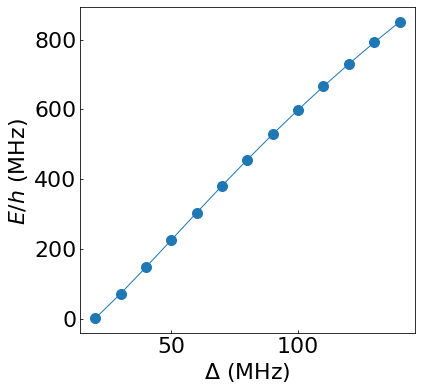

In [38]:
potentials = 'C3.csv'
delta_min = .02
delta_max = .15
delta_step = .01
intersections_data = lac.get_intersections(potentials, delta_min, delta_max, delta_step)
target_energy = 0.1
v_rel = 0.1

fig,ax1 = plt.subplots(figsize=(6,6))

# ax[1].plot(dist, test_count,label = 'no LZ')

intersections = [value[0] for value in intersections_data.values()]
detuning = list(intersections_data.keys())
# Plot energy versus intersection
Egain = []
for intersection in intersections:
    # print(intersection)
    dist, nearest_potential, _, _ = lac.get_slope_parameter(potentials, intersection, target_energy, plot=False)
    energy_gain = lac.get_collisional_energy(dist, nearest_potential, intersection, v_rel, 'energy')
    Egain.append(energy_gain)

    
ax1.plot(np.array(detuning)*1e3, np.array(Egain)*1e3,linewidth=1,marker = 'o',markersize=10)
    
# plt.plot(intersection, e_gain, marker='o', linestyle='-')
ax1.set_xlabel(r'$\Delta \ \mathrm{(MHz)}$')
ax1.set_ylabel(r'$P_{\mathrm{2 \rightarrow 0}}$')
ax1.xaxis.set_minor_locator(plt.NullLocator())
ax1.yaxis.set_minor_locator(plt.NullLocator())
plt.xlabel(r'$\Delta$ (MHz)')
plt.ylabel(r'$E/h \  \mathrm{(MHz)}$ ')
ax1.tick_params(axis='both', which='both', top=False, right=False, length=3)
ax1.grid(False)
plt.savefig("energy_gain.png", dpi=500,  bbox_inches='tight', pad_inches=0)


### variables vs condon radius

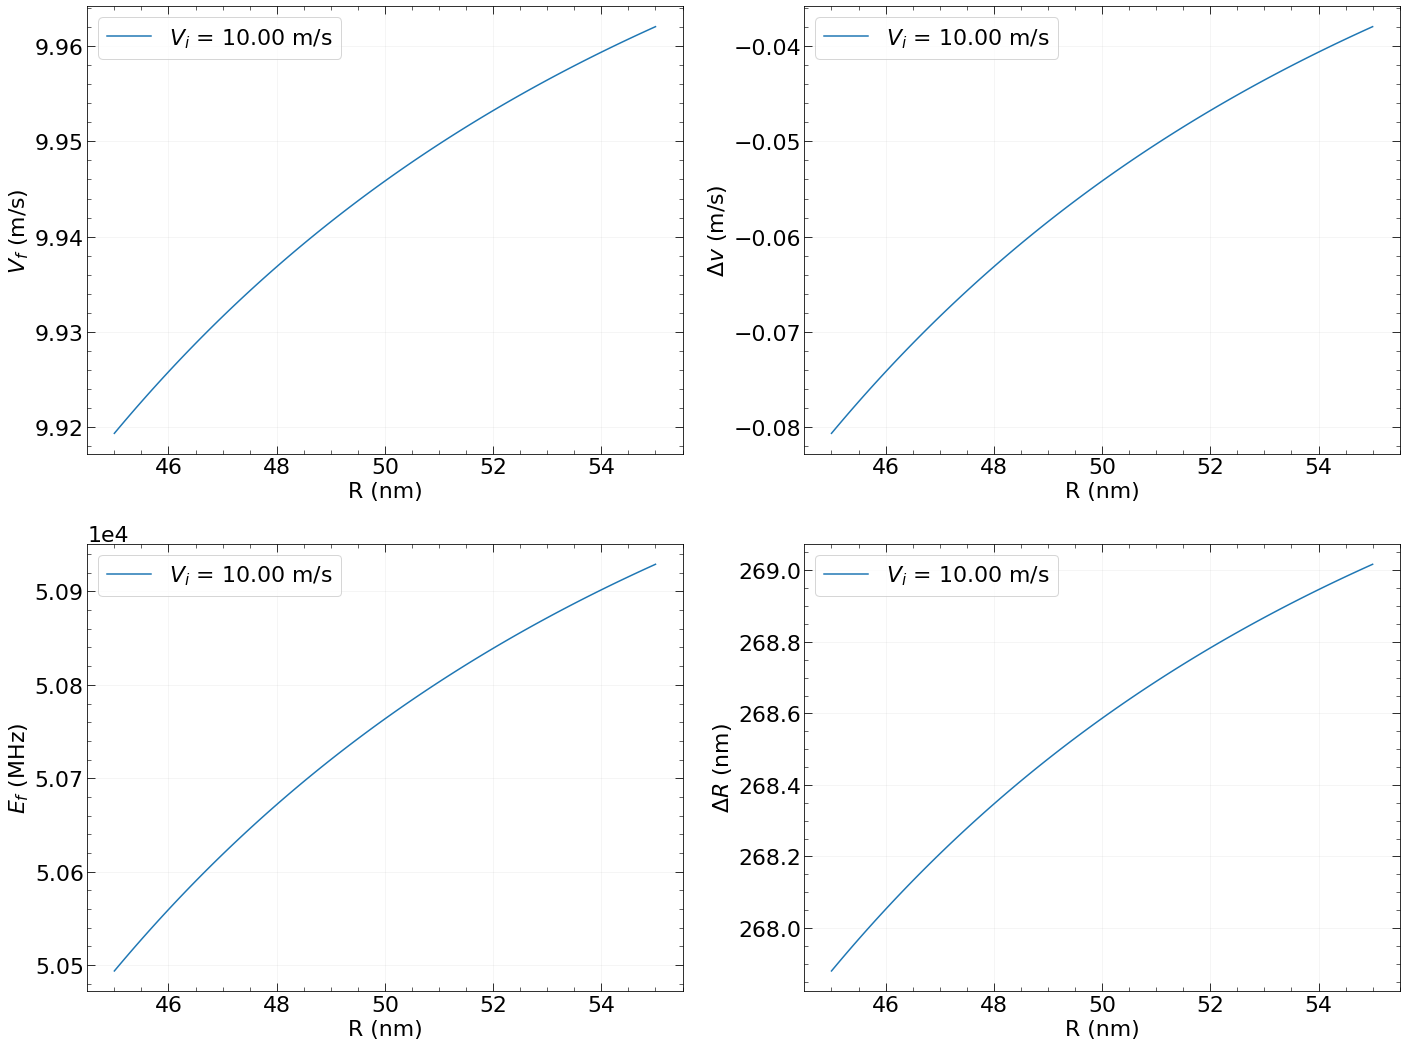

In [258]:
# Generate a range of R values from 20 nm to 100 nm
R_values = np.linspace(45e-9, 55e-9, 100)
fixed_t = 27e-9
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 15))

# Loop through different initial velocities and calculate V_final and E_final for each R value
for initial_velocity in np.linspace(10, 10, 1):  # Loop through velocities from 0 to 1 m/s
    R_final_values,V_final_values, E_final_values = zip(*[collision(R, initial_velocity,fixed_t) for R in R_values])

    # Plot V_final as a function of R
    ax1.plot(R_values * 1e9, V_final_values, label=f'$V_i$ = {initial_velocity:.2f} m/s')
    ax2.plot(R_values * 1e9, [v for v in V_final_values-initial_velocity], label=f'$V_i$ = {initial_velocity:.2f} m/s')
    # Plot E_final as a function of R
    ax4.plot(R_values * 1e9, [r*1e9 for r in R_final_values-R_values], label=f'$V_i$ = {initial_velocity:.2f} m/s')

    ax3.plot(R_values * 1e9, [E for E in E_final_values], label=f'$V_i$ = {initial_velocity:.2f} m/s')
    


# Set labels, titles, and legends
ax1.set_xlabel('R (nm)')
ax1.set_ylabel('$V_f$ (m/s)')
ax1.legend()
ax1.grid(True)

ax2.set_xlabel('R (nm)')
ax2.set_ylabel('$\Delta v$ (m/s)')
ax2.legend()
ax2.grid(True)

ax3.set_xlabel('R (nm)')
ax3.set_ylabel('$E_f$ (MHz)')
ax3.legend()
ax3.grid(True)

ax4.set_xlabel('R (nm)')
ax4.set_ylabel('$\Delta R$ (nm)')
ax4.legend()
ax4.grid(True)

plt.tight_layout()
plt.show()

### variables vs lifetime

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


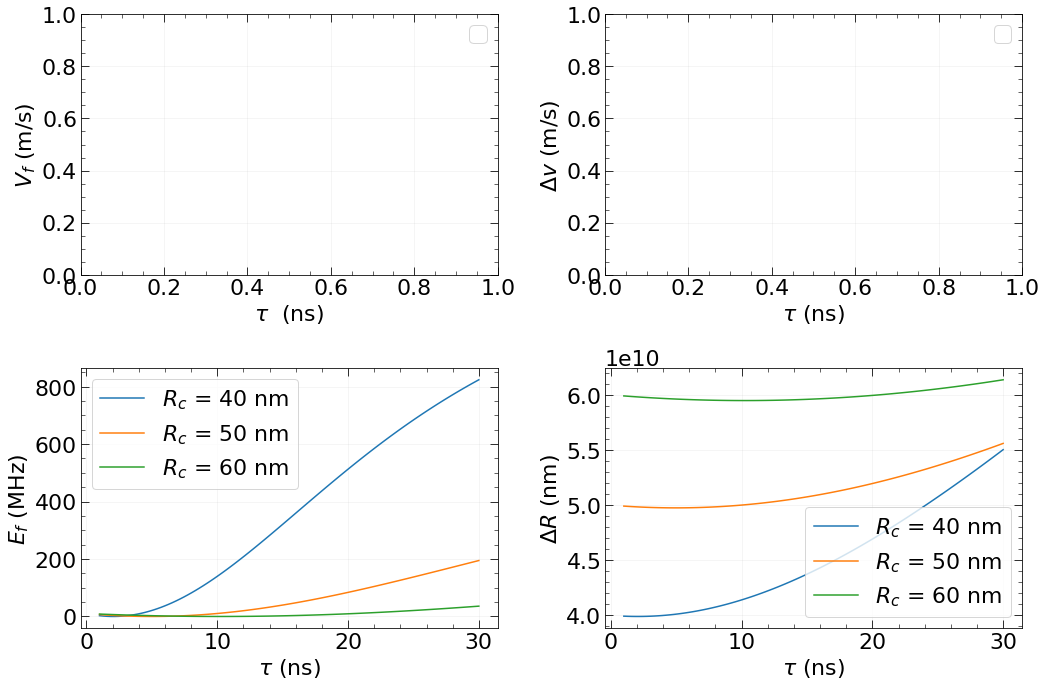

In [265]:
fixed_vi = 0.1

# Generate a range of dt values from 1 ns to 60 ns
dt_values = np.linspace(1e-9, 30e-9, 100)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Loop through different dt values and calculate R_final, V_final, and E_final for each dt value
for R in np.linspace(40e-9,60e-9,3):
    R_final_values, E_final_values = zip(*[collision(R, fixed_vi, dt,1) for dt in dt_values])

#     # Plot V_final as a function of dt
#     ax1.plot(dt_values * 1e9, V_final_values, label=f'$R_c$  = {R*1e9:.0f} nm')

#     # Plot difference between V_final and initial velocity
#     ax2.plot(dt_values * 1e9, [v - fixed_vi for v in V_final_values], label=f'$R_c$ = {R*1e9:.0f} nm')

#     # Plot E_final as a function of dt
    ax3.plot(dt_values * 1e9, [E for E in E_final_values], label=f'$R_c$ = {R*1e9:.0f} nm')

    # Plot difference between R_final and R
    ax4.plot(dt_values * 1e9, [(r - R)*1e9 for r in R_final_values], label=f'$R_c$ = {R*1e9:.0f} nm')

# Set labels, titles, and legends
ax1.set_xlabel(r'$\tau$  (ns)')
ax1.set_ylabel('$V_f$ (m/s)')
ax1.legend()
ax1.grid(True)

ax2.set_xlabel(r'$\tau$ (ns)')
ax2.set_ylabel('$\Delta v$ (m/s)')
ax2.legend()
ax2.grid(True)

ax3.set_xlabel(r'$\tau$ (ns)')
ax3.set_ylabel('$E_f$ (MHz)')
ax3.legend()
ax3.grid(True)

ax4.set_xlabel(r'$\tau $ (ns)')
ax4.set_ylabel('$\Delta R$ (nm)')
ax4.legend()
ax4.grid(True)

plt.tight_layout()
plt.show()

In [259]:
reload(lac)

<module 'Analysis_Python_Files.CollisionalAnalysis' from '/Users/stevenpampel/Documents/B232_Data_Analysis/Molecular_Potentials/../Analysis_Python_Files/CollisionalAnalysis.py'>

### repulsive potentials - energy release

In [78]:
potentials4 = 'C3_over4.csv'
potentials_matrix4 = np.loadtxt(potentials4, delimiter=',', skiprows=1)
dist_intrp4 = potentials_matrix4[:, 0]
potentials_si4 = potentials_matrix4[:, 1:] * cs.h * 1e9  # convert potentials to si units

potentials2 = 'C3_over2.csv'
potentials_matrix2 = np.loadtxt(potentials2, delimiter=',', skiprows=1)
dist_intrp2 = potentials_matrix2[:, 0]
potentials_si2 = potentials_matrix2[:, 1:] * cs.h * 1e9 # convert potentials to si units

potentials = 'C3.csv'
potentials_matrix = np.loadtxt(potentials, delimiter=',', skiprows=1)
dist_intrp = potentials_matrix[:, 0]
potentials_si = potentials_matrix[:, 1:] * cs.h * 1e9 # convert potentials to si units

potentials_t2 = 'C3_times2.csv'
potentials_matrix_t2 = np.loadtxt(potentials_t2, delimiter=',', skiprows=1)
dist_intrp_t2 = potentials_matrix_t2[:, 0]
potentials_si_t2 = potentials_matrix_t2[:, 1:] * cs.h * 1e9 # convert potentials to si units

In [79]:
initial_positions = np.linspace(40e-9, 60e-9, 100)
v_rel = .1
# Calculate final positions and energies for each initial position
final_positions4_energies4 = [lac.get_collisional_energy(dist_intrp4, potentials_si4, initial_position, v_rel) for initial_position in initial_positions]
final_positions2_energies2 = [lac.get_collisional_energy(dist_intrp2, potentials_si2, initial_position, v_rel) for initial_position in initial_positions]
final_positions_energies = [lac.get_collisional_energy(dist_intrp, potentials_si, initial_position, v_rel) for initial_position in initial_positions]
final_positions_t2_energies_t2 = [lac.get_collisional_energy(dist_intrp_t2, potentials_si_t2, initial_position, v_rel) for initial_position in initial_positions]

# Unpack the results for plotting
final_positions4, final_energies4 = zip(*[(result[0], result[2]) for result in final_positions4_energies4])
final_positions2, final_energies2 = zip(*[(result[0], result[2]) for result in final_positions2_energies2])
final_positions, final_energies = zip(*[(result[0], result[2]) for result in final_positions_energies])
final_positions_t2, final_energies_t2 = zip(*[(result[0], result[2]) for result in final_positions_t2_energies_t2])


fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Final position vs initial position
axs[0].plot(initial_positions*1e9, np.array(final_positions4)*1e9, label='C3/4')
axs[0].plot(initial_positions*1e9, np.array(final_positions2)*1e9, label='C3/2')
axs[0].plot(initial_positions*1e9, np.array(final_positions)*1e9, label='C3')
axs[0].plot(initial_positions*1e9, np.array(final_positions_t2)*1e9, label='2C3')
axs[0].set_xlabel('Initial Position (nm)')
axs[0].set_ylabel('Final Position (nm)')
axs[0].grid(True)

# Final energy vs initial position
axs[1].plot(initial_positions*1e9, np.array(final_energies4))
axs[1].plot(initial_positions*1e9, np.array(final_energies2))
axs[1].plot(initial_positions*1e9, np.array(final_energies))
axs[1].plot(initial_positions*1e9, np.array(final_energies_t2))
axs[1].set_xlabel('Initial Position (nm)')
axs[1].set_ylabel('Final Energy (MHz)')
axs[1].grid(True)

# Single legend above both figures
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), fancybox=True, shadow=True, ncol=4)

plt.tight_layout()
plt.show()


IndexError: invalid index to scalar variable.

### attractive potentials - energy release

In [311]:
potentials4 = 'C3_over4_neg.csv'
potentials_matrix4 = np.loadtxt(potentials4, delimiter=',', skiprows=1)
dist_intrp4 = potentials_matrix4[:, 0]
potentials_si4 = potentials_matrix4[:, 1:] * cs.h * 1e9  # convert potentials to si units

potentials2 = 'C3_over2_neg.csv'
potentials_matrix2 = np.loadtxt(potentials2, delimiter=',', skiprows=1)
dist_intrp2 = potentials_matrix2[:, 0]
potentials_si2 = potentials_matrix2[:, 1:] * cs.h * 1e9 # convert potentials to si units

potentials = 'C3_neg.csv'
potentials_matrix = np.loadtxt(potentials, delimiter=',', skiprows=1)
dist_intrp = potentials_matrix[:, 0]
potentials_si = potentials_matrix[:, 1:] * cs.h * 1e9 # convert potentials to si units

potentials_t2 = 'C3_times2_neg.csv'
potentials_matrix_t2 = np.loadtxt(potentials_t2, delimiter=',', skiprows=1)
dist_intrp_t2 = potentials_matrix_t2[:, 0]
potentials_si_t2 = potentials_matrix_t2[:, 1:] * cs.h * 1e9 # convert potentials to si units

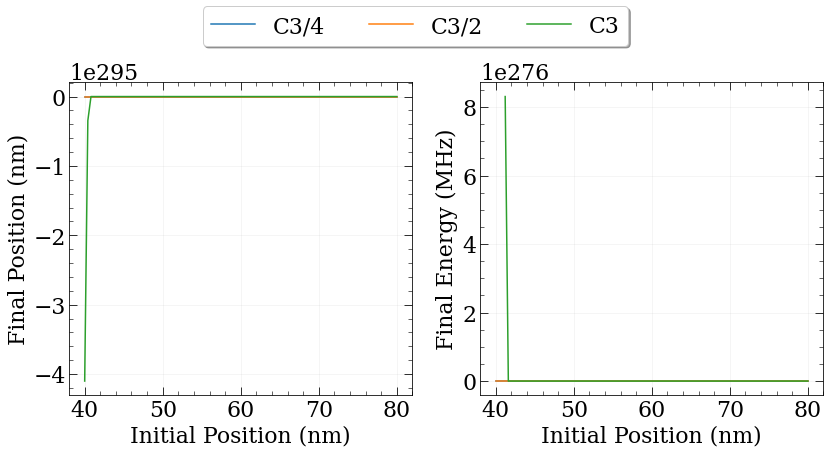

In [315]:
initial_positions = np.linspace(40e-9, 80e-9, 100)
v_rel = .1
# Calculate final positions and energies for each initial position
final_positions4_energies4 = [lac.get_collisional_energy(dist_intrp4, potentials_si4, initial_position, v_rel) for initial_position in initial_positions]
final_positions2_energies2 = [lac.get_collisional_energy(dist_intrp2, potentials_si2, initial_position, v_rel) for initial_position in initial_positions]
final_positions_energies = [lac.get_collisional_energy(dist_intrp, potentials_si, initial_position, v_rel) for initial_position in initial_positions]
final_positions_t2_energies_t2 = [lac.get_collisional_energy(dist_intrp_t2, potentials_si_t2, initial_position, v_rel) for initial_position in initial_positions]

# Unpack the results for plotting
final_positions4, final_energies4 = zip(*[(result[0], result[2]) for result in final_positions4_energies4])
final_positions2, final_energies2 = zip(*[(result[0], result[2]) for result in final_positions2_energies2])
final_positions, final_energies = zip(*[(result[0], result[2]) for result in final_positions_energies])
final_positions_t2, final_energies_t2 = zip(*[(result[0], result[2]) for result in final_positions_t2_energies_t2])


fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Final position vs initial position
axs[0].plot(initial_positions*1e9, np.array(final_positions4)*1e9, label='C3/4')
axs[0].plot(initial_positions*1e9, np.array(final_positions2)*1e9, label='C3/2')
axs[0].plot(initial_positions*1e9, np.array(final_positions)*1e9, label='C3')
# axs[0].plot(initial_positions*1e9, np.array(final_positions_t2)*1e9, label='2C3')
axs[0].set_xlabel('Initial Position (nm)')
axs[0].set_ylabel('Final Position (nm)')
axs[0].grid(True)

# Final energy vs initial position
axs[1].plot(initial_positions*1e9, np.array(final_energies4))
axs[1].plot(initial_positions*1e9, np.array(final_energies2))
axs[1].plot(initial_positions*1e9, np.array(final_energies))
# axs[1].plot(initial_positions*1e9, np.array(final_energies_t2))
axs[1].set_xlabel('Initial Position (nm)')
axs[1].set_ylabel('Final Energy (MHz)')
axs[1].grid(True)

# Single legend above both figures
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), fancybox=True, shadow=True, ncol=4)

plt.tight_layout()
plt.show()


In [100]:
reload(lac)

<module 'Analysis_Python_Files.CollisionalAnalysis' from '/Users/stevenpampel/Documents/B232_Data_Analysis/Molecular_Potentials/../Analysis_Python_Files/CollisionalAnalysis.py'>

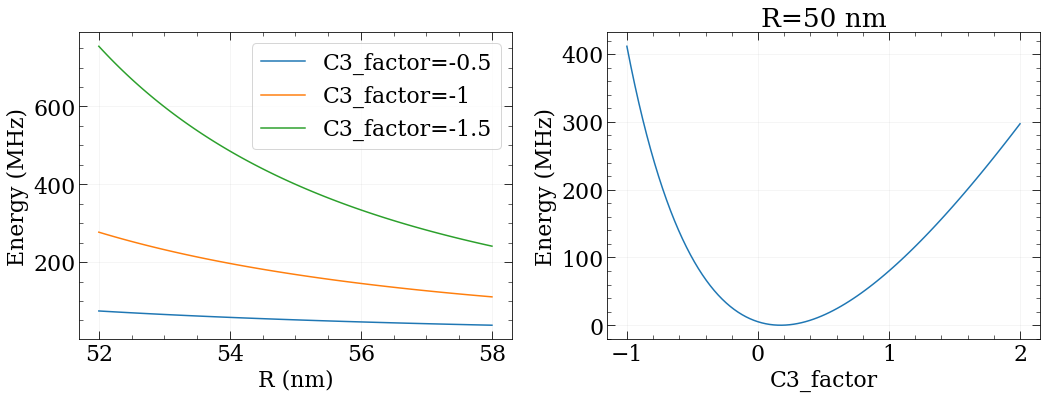

In [279]:
import numpy as np
import matplotlib.pyplot as plt

# Define your constants like cs.Rb87_C3, cs.Rb87_M, and cs.hbar

# Define the functions
def diff_eq_collision(t, r, C3_factor):
    drdt = np.zeros(2)
    drdt[0] = r[1]
    drdt[1] = C3_factor * 3 * cs.Rb87_C3 / (cs.Rb87_M * r[0]**4)
    return drdt

def collision(R, V, C3_factor):
    dt = 27e-9
    r0 = [R, -V]
    t_span = [0, dt]
    sol = solve_ivp(lambda t, r: diff_eq_collision(t, r, C3_factor), t_span, r0, t_eval=np.linspace(0, dt, 1000))
    velocities = sol.y[1]
    E_final_MHz = 3 / 8 * cs.Rb87_M * velocities[-1]**2 / cs.hbar * 1e-6
    return E_final_MHz 

# Initial velocity and time duration
V = 0.1

# List of C3_factor values to iterate over
C3_factors = [-0.5, -1, -1.5]  # Add more values as needed

# Range of R values to plot
R_values = np.linspace(52e-9, 58e-9, 100)

# Plotting
plt.figure(figsize=(15, 6))

# Plot 1: Final energy as a function of R for different C3_factors
plt.subplot(1, 2, 1)
for C3_factor in C3_factors:
    E_final_MHz_values = [collision(R, V, C3_factor) for R in R_values]
    plt.plot(R_values * 1e9, E_final_MHz_values, label=f'C3_factor={C3_factor}')
plt.xlabel('R (nm)')
plt.ylabel('Energy (MHz)')
# plt.title('Final Energy (MHz) as a function of R for different C3_factors')
plt.legend()
plt.grid(True)
# plt.ylim(1,40)
# Plot 2: Final energy as a function of C3_factor for a fixed R
plt.subplot(1, 2, 2)
C3_factors = np.linspace(-1,2,100)
fixed_R = 50e-9
E_final_MHz_values_fixed_R = [collision(fixed_R, V, C3_factor) for C3_factor in C3_factors]
plt.plot(C3_factors, E_final_MHz_values_fixed_R)
plt.xlabel('C3_factor')
plt.ylabel('Energy (MHz)')
plt.title('R=50 nm')
plt.grid(True)

plt.tight_layout()
plt.show()


In [241]:
distance = 4.520867535791285e-08
print(collision(distance, .1, .5),lac.get_collisional_energy(distance,.1,1) )

41.58292284611508 172.01450270588225


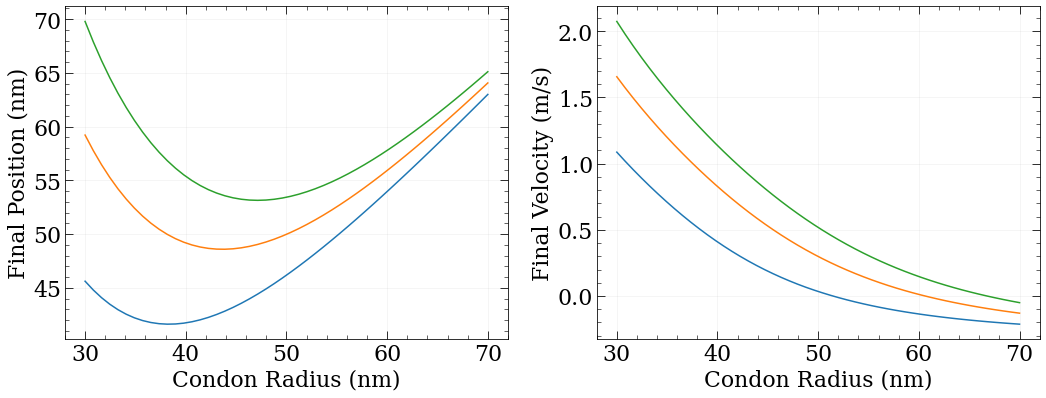

In [216]:
import numpy as np
import matplotlib.pyplot as plt

# Define your constants like cs.Rb87_C3, cs.Rb87_M, and cs.hbar

def diff_eq_collision(t, r, C3_factor):
    drdt = np.zeros(2)
    drdt[0] = r[1]
    drdt[1] = C3_factor * 3 * cs.Rb87_C3 / (cs.Rb87_M * r[0]**4)
    return drdt

def collision(R, V, dt, C3_factor):
    r0 = [R, -V]
    t_span = [0, dt]
    sol = solve_ivp(lambda t, r: diff_eq_collision(t, r, C3_factor), t_span, r0, t_eval=np.linspace(0, dt, 1000))
    positions = sol.y[0]
    velocities = sol.y[1]
    final_position = positions[-1]
    final_velocity = velocities[-1]
    E_final_MHz = 3 / 8 * cs.Rb87_M * final_velocity**2 / cs.hbar * 1e-6
    return final_position, final_velocity, E_final_MHz

# Initial velocity and time duration
V = 0.3
dt = 27e-9

# List of initial positions to plot
R_values = np.linspace(30e-9, 70e-9, 50)

# List of C3 factors
C3_factors = [.5, 1.0, 1.5]

# Plotting
plt.figure(figsize=(15, 6))

# Final position vs initial position
plt.subplot(1, 2, 1)
for C3_factor in C3_factors:
    final_positions = [collision(R, V, dt, C3_factor)[0]*1e9 for R in R_values]
    plt.plot(R_values*1e9, final_positions, label=f'C3_factor={C3_factor}')

plt.xlabel('Condon Radius (nm)')
plt.ylabel('Final Position (nm)')
# plt.title('Final Position vs Initial Position')
# plt.legend()
plt.grid(True)

# Final velocity vs initial position
plt.subplot(1, 2, 2)
for C3_factor in C3_factors:
    final_velocities = [collision(R, V, dt, C3_factor)[1] for R in R_values]
    plt.plot(R_values*1e9, final_velocities, label=f'C3_factor={C3_factor}')

plt.xlabel('Condon Radius (nm)')
plt.ylabel('Final Velocity (m/s)')
# plt.title('Final Velocity vs Initial Position')
# plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# rabi rate vs intensity

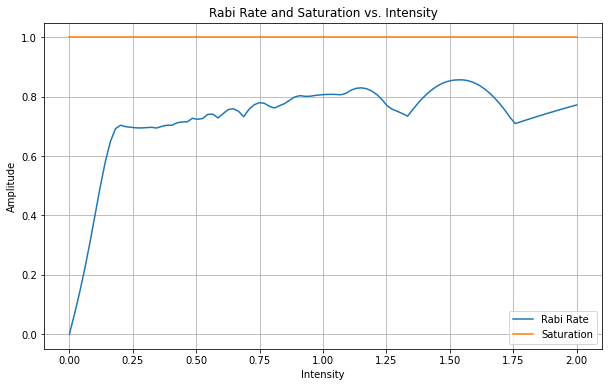

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from scipy.constants import e, hbar

# Define constants
omega_0 = 1.0  # Transition frequency
gamma = 0.1   # Spontaneous decay rate
t_list = np.linspace(0, 20, 500)  # Time values
intensity_list = np.linspace(0, 2, 100)  # Intensity values

# Create lists to store Rabi rates and saturation values
rabi_rates = []
saturation_values = []

# Perform simulations for different intensities
for intensity in intensity_list:
    omega = 2 * np.pi * omega_0  # Angular frequency for this intensity
    H0 = 0.5 * omega * sigmaz()
    H1 = intensity * sigmax()
    
    H = [H0, [H1, f'sin({omega}*t)']]  # Time-dependent Hamiltonian using f-string
    
    result = mesolve(H, basis(2, 0), t_list, [np.sqrt(gamma) * sigmam()], [sigmax(), sigmay(), sigmaz()])
    
    # Calculate Rabi rate as the amplitude of the oscillations
    rabi_amplitude = max(result.expect[0])  # Assuming Rabi oscillates in the X direction
    
    # Calculate saturation (probability of being in the excited state)
    saturation = max(result.expect[2])
    
    rabi_rates.append(rabi_amplitude)
    saturation_values.append(saturation)

# Plot Rabi rate as a function of intensity with saturation
plt.figure(figsize=(10, 6))
plt.plot(intensity_list, rabi_rates, label='Rabi Rate')
plt.plot(intensity_list, saturation_values, label='Saturation')
plt.xlabel('Intensity')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Rabi Rate and Saturation vs. Intensity')
plt.grid(True)
plt.show()


# Landau-Zener Model

The probability for a single LZ transition is given by $P_{L Z}=\exp \left(\frac{-2 \pi \Omega^2}{3 v \Delta}\left(\frac{C_3}{\hbar \Delta}\right)^{1 / 3}\right)$

The probability for a single adiabatic following is $P_{A}=1-P_{L Z}$

A repulsive inelastic collision is defined by a LZ transition followed by an adiabatic transition or vice verse. 


Therefore the inelastic collision probability is 

$P_{IR}=2 P_{L Z} P_A=2 P_{L Z}\left(1-P_{L Z}\right)$

For an attractive potential, the inelastic collision probability is 

$P_{I A}=P_A+\frac{P_{L Z}^2 P_A}{1-P_A^2}=1-\frac{P_{L Z}}{2-P_{L Z}}$

The Rabi rate is $\Omega =\frac{d E}{ \hbar}$ and $I= \frac{1}{2}c \epsilon_{0} E^2$

Steck gives $d = 2.537 \times 10^{-29} \ C \cdot m $  for D1 and $d = 3.584 \times 10^{-29} \ C \cdot m $ for D2

Using saturation intenisites for D1 and D2 :

$I_{D1} = 4.484 \frac{mW}{cm^2} = 44.84 \frac{W}{m^2}$ and $I_{D2} = 2.503 \frac{mW}{cm^2} = 25.03 \frac{W}{m^2}$ 

In [59]:
detuning = 2*np.pi*50e6
# Omega = 2*np.pi*2e6
Omega = lac.rabiRate(cs.muD2, 1.3*cs.IsatD2)/5 
print(Omega)
R_plus = ((cs.Rb87_C3)/(cs.hbar*detuning+cs.hbar*Omega/2))**(1/3)
R_minus = ((cs.Rb87_C3)/(cs.hbar*detuning-cs.hbar*Omega/2))**(1/3)
delta_R = abs(R_plus-R_minus)    
print(delta_R)

10642758.995384905
6.370222125646864e-10


In [108]:
def int_distance(detuning,Omega):
    R_plus = ((cs.Rb87_C3)/(cs.hbar*detuning+cs.hbar*Omega/2))**(1/3)
    R_minus = ((cs.Rb87_C3)/(cs.hbar*detuning-cs.hbar*Omega/2))**(1/3)
    delta_R = abs(R_plus-R_minus)      
    return delta_R

Text(0.5, 0, 'detuning (MHz)')

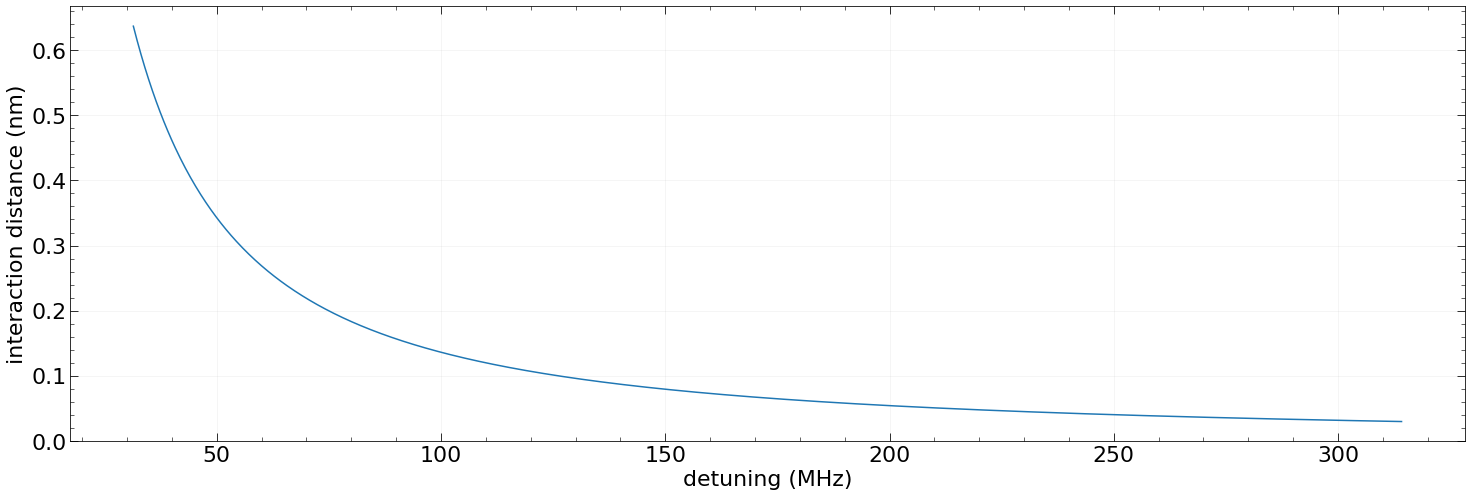

In [113]:
deltas = np.linspace(2*np.pi*50e6,2*np.pi*500e6,1000)
plt.plot(deltas*1e-7,int_distance(deltas,Omega)*1e9)
# plt.yscale('log')
plt.ylabel('interaction distance (nm)')
plt.xlabel('detuning (MHz)')

In [105]:
delta = 100*np.pi*1e6
Omega = 2*np.pi*2e6
2**(1/3)* cs.Rb87_C3**(1/3)/((2*delta*cs.hbar+Omega*cs.hbar)**1/3)

10131115367.83406

In [83]:
-3**(1/3)

-1.4422495703074083

In [79]:
cs.Rb87_C3

5.94492796981645e-48

In [65]:
def atomVelocity(T):
    v = np.sqrt(4*cs.k_B * T/cs.Rb87_M) 
    return v

In [66]:
def rabiRate(mu,I): 
    E = np.sqrt(2*I/(cs.c*cs.epsilon0))
    omega = (mu/cs.hbar)*E
    return omega/(2*np.pi)

In [1261]:
rabiRate(cs.muD2,1.3*cs.IsatD2)*1e-6

8.46923851125621

In [60]:
def rabiRateGen(mu,I,delta): 
    E = np.sqrt(2*I/(cs.c*cs.epsilon0))
    omega = (mu/cs.hbar)*E
    rabi_gen = np.sqrt(omega**2+(delta*1e6)**2)
    return rabi_gen/(2*np.pi)

In [61]:
def P_inelastic_redLZ(T,I,mu,delta):
    v = atomVelocity(T)
    Omega = rabiRate(mu,I)
    PLZ = np.exp((-2 * np.pi * Omega**2) / (3 * v * delta*1e6) * ((cs.Rb87_C3 / (cs.hbar * delta*1e6))**(1 / 3))) 
    P_in = 1-PLZ/(2-PLZ)
    return P_in

In [62]:
def P_inelastic_blueLZ(T,I,mu,delta):
    v = atomVelocity(T)
    Omega = rabiRate(mu,I)
    PLZ = np.exp((-2 * np.pi * Omega**2) / (3 * v * delta*1e6) * ((cs.Rb87_C3 / (cs.hbar * delta*1e6))**(1 / 3))) 
    P_in = 2*PLZ*(1-PLZ)
    return P_in

In [1265]:
def alpha(R):
    return 3*cs.Rb87_C3/R**4

In [14]:
alpha(25e-9)

4.565704680819035e-17

In [15]:
potential = 'C3.csv'
energy_matrix = np.loadtxt(potential, delimiter=',', skiprows=1)
distances = energy_matrix[:, 0]
energy_curves = energy_matrix[:, 1:]
# print(distances)

In [16]:
potential = 'C3_over4.csv'
target_distance = 25e-9
target_energy = 0.25
v_rel = 0.17
dist, nearest_potential, slope_parameter = lac.get_slope_parameter(potential, target_distance, target_energy)
plt.plot(dist,-1/2*cs.Rb87_C3/dist**3)
plt.plot(dist,nearest_potential)
# plt.ylim(-1,1)
print(slope_parameter)

FileNotFoundError: C3_over4.csv not found.

In [450]:
reload(lac)

<module 'Analysis_Python_Files.CollisionalAnalysis' from '/Users/stevenpampel/Documents/B232_Data_Analysis/Molecular_Potentials/../Analysis_Python_Files/CollisionalAnalysis.py'>

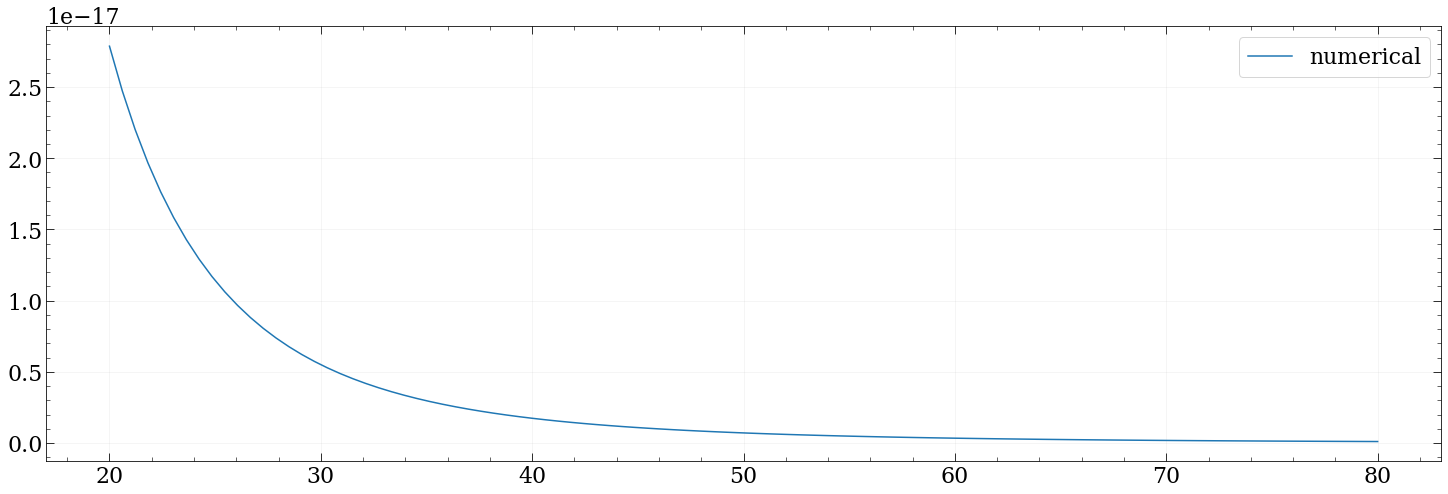

In [456]:
Rvals = np.linspace(20,80,100)*1e-9

alpha = []
for R in Rvals:
    slope = lac.get_slope_parameter(potential, R, .2)[2]
    alpha.append(slope)
    
plt.plot(Rvals*1e9,alpha, label = 'numerical')
# plt.plot(Rvals*1e9,1/4*3*cs.Rb87_C3/Rvals**4,label='analytic')
plt.legend()

### Rabi Rate vs Detuning 

In [351]:
reload(lac)

<module 'Analysis_Python_Files.CollisionalAnalysis' from '/Users/stevenpampel/Documents/B232_Data_Analysis/Molecular_Potentials/../Analysis_Python_Files/CollisionalAnalysis.py'>

ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

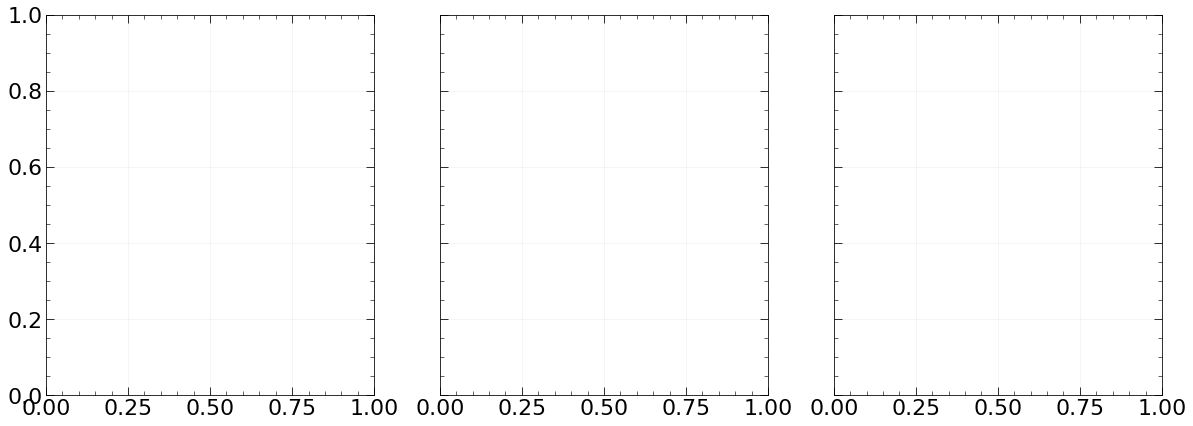

In [63]:
fig, ax = plt.subplots(1,3, figsize=(20, 7),sharey=True)
r = np.linspace(1e-9,100e-9,100)
ax[0].plot(r*1e9,lac.P_inelastic_red_R(0.1, 1.3*cs.IsatD1, cs.muD1, r,1)[0],label = 'correct')
ax[0].plot(r*1e9,lac.P_inelastic_red_R(0.1, 1.3*cs.IsatD1, cs.muD1, r,1)[1],label='incorrect')
ax[0].set_xlabel('distance (nm)')
ax[0].set_ylabel(r'$P_{in}$')
delta = np.linspace(10,1000,100)
ax[1].plot(delta*1e-3,lac.P_inelastic_red(0.1,1.3*cs.IsatD1, cs.muD1,delta)[0],label = 'correct')
ax[1].plot(delta*1e-3,lac.P_inelastic_red(0.1,1.3*cs.IsatD1, cs.muD1,delta)[1],label='incorrect')

ax[1].set_xlabel(r'$\Delta$ (GHz)')

slope = np.linspace(1e-20,5e-17,100)
ax[2].plot(slope,lac.P_inelastic_red_slope(slope,0.1,1.3*cs.IsatD1, cs.muD1)[0],label = 'correct')
ax[2].plot(slope,lac.P_inelastic_red_slope(slope,0.1,1.3*cs.IsatD1, cs.muD1)[1],label='incorrect')
ax[2].set_xlabel(r'$\alpha$')
fig.suptitle('Landau-Zener Probabilites (attractive)')
ax[0].legend(loc = 'lower right')
ax[1].legend(loc = 'lower right')
ax[2].legend(loc = 'lower right')
plt.tight_layout()

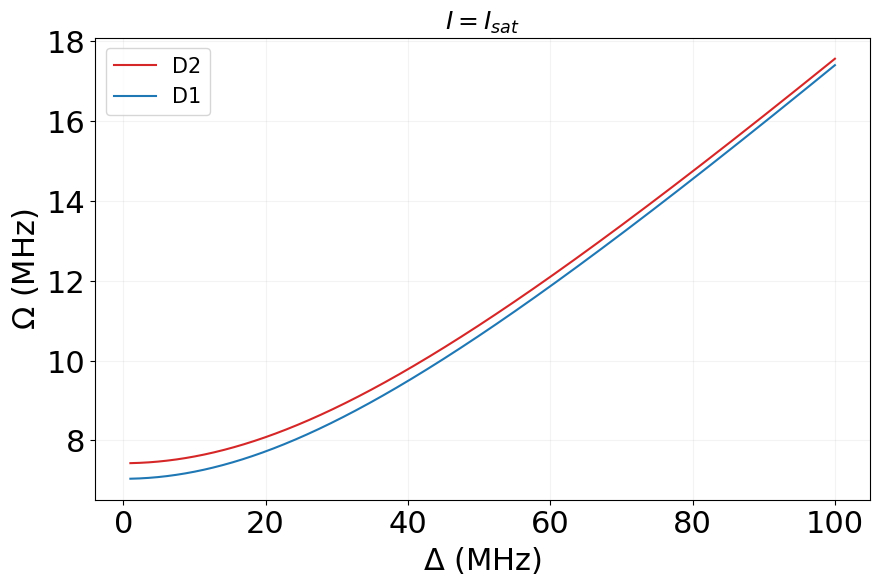

In [336]:
fig, ax = plt.subplots(figsize=(10, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
delta = np.linspace(1,100,1000)
IsatD1 = 4.484
IsatD2 = 2.503
muD1=2.537e-29
muD2=3.584e-29
ax.plot(delta,rabiRateGen(muD2,IsatD2*10,delta)*1e-6, color = 'tab:red',label = 'D2')
ax.plot(delta,rabiRateGen(muD1,IsatD1*10,delta)*1e-6, color = 'tab:blue',label = 'D1')
plt.xlabel(r'$\Delta $ (MHz)')
plt.ylabel(r'$\Omega$ (MHz)');
plt.legend(fontsize=15)
plt.title(r'$I=I_{sat}$',fontsize=18);

### Inelastic Prob vs detuning

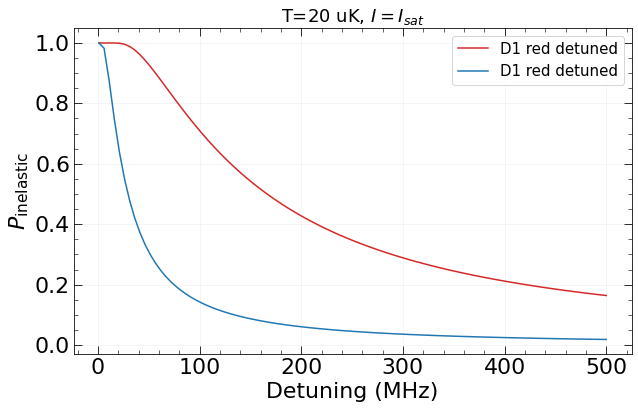

In [72]:
delta = np.linspace(1,500,100)
temp = np.linspace(1e-6,100e-6,100)
IsatD1 = cs.IsatD1
IsatD2 = cs.IsatD1
muD1=cs.muD1
muD2=cs.muD2

fig, ax = plt.subplots(figsize=(10, 6))
T=30e-6
# ax.plot(delta,P_inelastic_blueLZ(10e-6,IsatD1,muD1,delta), color = 'tab:blue',label = 'D1 blue detuned')
# ax.plot(delta,P_inelastic_blueLZ(30e-6,IsatD1,muD1,delta), color = 'tab:green',label = 'D1 blue detuned')
ax.plot(delta,P_inelastic_redLZ(T,IsatD1,muD1,delta), color = 'tab:red',label = 'D1 red detuned')
ax.plot(delta,P_inelastic_redLZ(T,IsatD1/10,muD1,delta), color = 'tab:blue',label = 'D1 red detuned')

# ax.plot(delta,P_inelastic_blueLZ(T,IsatD2,muD2,delta),linestyle = '--', color = 'tab:blue',label = 'D2 blue detuned')
# ax.plot(delta,P_inelastic_redLZ(T,IsatD2,muD2,delta),linestyle = '--', color = 'tab:red',label = 'D2 red detuned')
plt.xlabel('Detuning (MHz)')
plt.ylabel(r'$P_{\mathrm{inelastic}}$');
plt.title('T=20 uK, $I=I_{sat}$',fontsize=18)
plt.legend(fontsize=15)

In [53]:
reload(lac)

<module 'Analysis_Python_Files.CollisionalAnalysis' from '/Users/stevenpampel/Documents/B232_Data_Analysis/Molecular_Potentials/../Analysis_Python_Files/CollisionalAnalysis.py'>

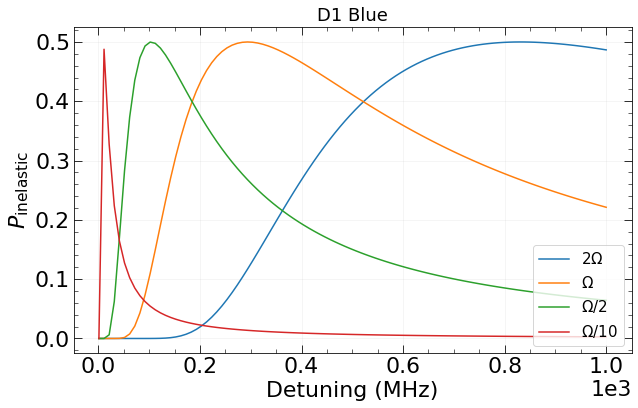

In [66]:
delta = np.linspace(1,1000,100)
temp = np.linspace(1e-6,100e-6,100)
IsatD1 = cs.IsatD1
IsatD2 = cs.IsatD1
muD1=cs.muD1
muD2=cs.muD2

fig, ax = plt.subplots(figsize=(10, 6))
T=30e-6
ax.plot(delta,lac.P_inelastic_blue(0.1,IsatD1,muD1,delta,Omega_factor=2),label = r'$2\Omega$')
ax.plot(delta,lac.P_inelastic_blue(0.1,IsatD1,muD1,delta,Omega_factor=1),label = r'$\Omega$')
ax.plot(delta,lac.P_inelastic_blue(0.1,IsatD1,muD1,delta,Omega_factor=1/2),label = r'$\Omega/2$')
ax.plot(delta,lac.P_inelastic_blue(0.1,IsatD1,muD1,delta,Omega_factor=1/10),label = r'$\Omega/10$')
# ax.plot(delta,lac.P_inelastic_blue(0.1,IsatD1,muD1,delta,C3_factor = 2),label = r'$\Omega/100$')

plt.xlabel('Detuning (MHz)')
plt.ylabel(r'$P_{\mathrm{inelastic}}$');
plt.title('D1 Blue',fontsize=18)
plt.legend(fontsize=15,loc=4)

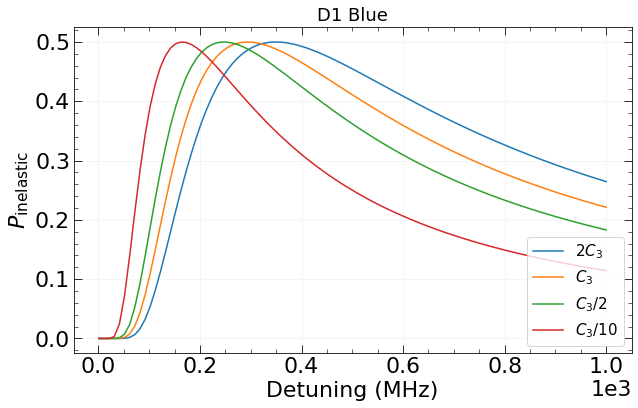

In [71]:
delta = np.linspace(1,1000,100)
temp = np.linspace(1e-6,100e-6,100)
IsatD1 = cs.IsatD1
IsatD2 = cs.IsatD1
muD1=cs.muD1
muD2=cs.muD2

fig, ax = plt.subplots(figsize=(10, 6))
T=30e-6
ax.plot(delta,lac.P_inelastic_blue(0.1,IsatD1,muD1,delta,C3_factor=2),label = r'$2C_3$')
ax.plot(delta,lac.P_inelastic_blue(0.1,IsatD1,muD1,delta,C3_factor=1),label = r'$C_3$')
ax.plot(delta,lac.P_inelastic_blue(0.1,IsatD1,muD1,delta,C3_factor=1/2),label = r'$C_3/2$')
ax.plot(delta,lac.P_inelastic_blue(0.1,IsatD1,muD1,delta,C3_factor=1/10),label = r'$C_3/10$')
# ax.plot(delta,lac.P_inelastic_blue(0.1,IsatD1,muD1,delta,C3_factor = 2),label = r'$\Omega/100$')

plt.xlabel('Detuning (MHz)')
plt.ylabel(r'$P_{\mathrm{inelastic}}$');
plt.title('D1 Blue',fontsize=18)
plt.legend(fontsize=15,loc=4)

Text(0, 0.5, 'inelastic prob')

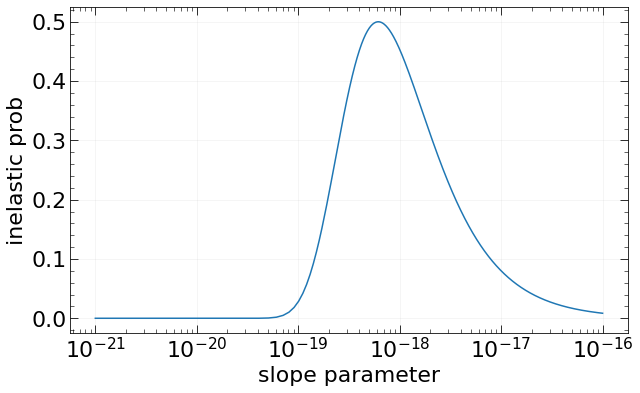

In [28]:
def rabiRate(mu,I): 
    E = np.sqrt(2*I/(cs.c*cs.epsilon0))
    omega = (mu/cs.hbar)*E
    return omega/(2*np.pi)

def P_inelastic_blue_slope(alpha,v,I,mu):
    Omega = rabiRate(mu,I)
    PLZ = np.exp((-2 * np.pi * Omega**2 * cs.hbar ) / (alpha * v )) 
    P_in = 2*PLZ*(1-PLZ)
    return P_in

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
alpha = np.linspace(1e-21,1e-16,10000)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(alpha,P_inelastic_blue_slope(alpha,.1,1.3*cs.IsatD1, cs.muD1))
ax.set_xscale('log')
plt.xlabel('slope parameter')
plt.ylabel('inelastic prob')

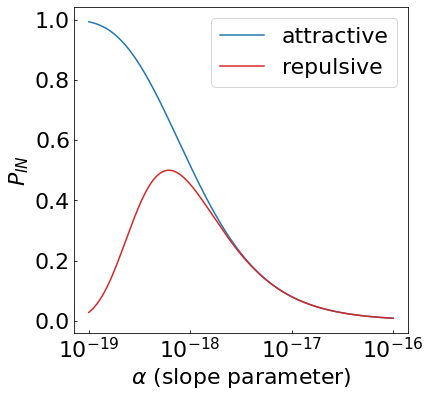

In [12]:
def rabiRate(mu,I): 
    E = np.sqrt(2*I/(cs.c*cs.epsilon0))
    omega = (mu/cs.hbar)*E
    return omega/(2*np.pi)

def P_inelastic_blue_slope(alpha,v,I,mu):
    Omega = rabiRate(mu,I)
    PLZ = np.exp((-2 * np.pi * Omega**2 * cs.hbar ) / (alpha * v )) 
    P_in = 2*PLZ*(1-PLZ)
    return P_in

def P_inelastic_red_slope(alpha,v,I,mu):
    Omega = rabiRate(mu,I)
    PLZ = np.exp((-2 * np.pi * Omega**2 * cs.hbar ) / (alpha * v )) 
    P_in = 1-PLZ/(2-PLZ)
    return P_in

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
alpha = np.linspace(1e-19,1e-16,10000)
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(alpha,P_inelastic_red_slope(alpha,.1,1.3*cs.IsatD1, cs.muD1),color='tab:blue',label='attractive')
ax.plot(alpha,P_inelastic_blue_slope(alpha,.1,1.3*cs.IsatD1, cs.muD1),color='tab:red',label='repulsive')

ax.set_xscale('log')
ax.set_xlabel(r'$\alpha$ (slope parameter)')
ax.set_ylabel(r'$P_{IN}$')
ax.xaxis.set_minor_locator(plt.NullLocator())
ax.yaxis.set_minor_locator(plt.NullLocator())
ax.grid(False)
ax.legend()
ax.tick_params(axis='both', which='both', top=False, right=False, length=3)
plt.savefig("inelastic_alpha.png", dpi=500,  bbox_inches='tight', pad_inches=0)


### Inelastic Prob vs temperature

Text(0.5, 1.0, '$\\Delta = 150$ MHz, $I=I_{sat}$')

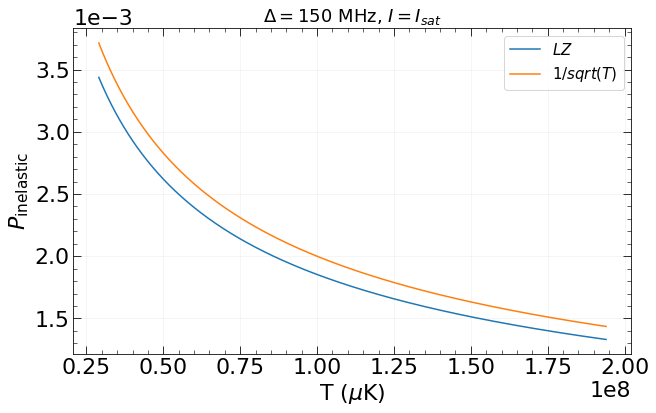

In [3]:
delta = 135
T=np.linspace(35-6,200-6,1000)
IsatD1 = 4.484
IsatD2 = 25.03
muD1=2.537e-29
muD2=3.584e-29

fig, ax = plt.subplots(figsize=(10, 6))
# ax.plot(T*1e6,P_inelastic_blueLZ(T,cs.IsatD1,cs.muD1,delta)*1e8, color = 'tab:blue',label = 'D1 blue detuned')
ax.plot(T*1e6,lac.P_inelastic_blue(np.sqrt(cs.k_B*T/cs.Rb87_M),cs.IsatD1,cs.muD1,delta,C3_factor=1/10),label = r'$LZ$')
ax.plot(T*1e6,1/np.sqrt(T)*2e-2,label = r'$1/sqrt(T)$')
# ax.plot(T*1e6,P_inelastic_redLZ(T,IsatD1,muD1,delta), color = 'tab:red',label = 'D1 red detuned')
# ax.plot(T*1e6,P_inelastic_blueLZ(T,IsatD2,muD2,delta),linestyle = '--', color = 'tab:blue',label = 'D2 blue detuned')
# ax.plot(T*1e6,P_inelastic_redLZ(T,IsatD2,muD2,delta),linestyle = '--', color = 'tab:red',label = 'D2 red detuned')
plt.xlabel(r'T ($\mu$K)')
plt.ylabel(r'$P_{\mathrm{inelastic}}$');
# plt.ylim(0,1)
# ax.set_yscale('log')
plt.legend(fontsize=15)
plt.title(r'$\Delta = 150$ MHz, $I=I_{sat}$',fontsize=18)

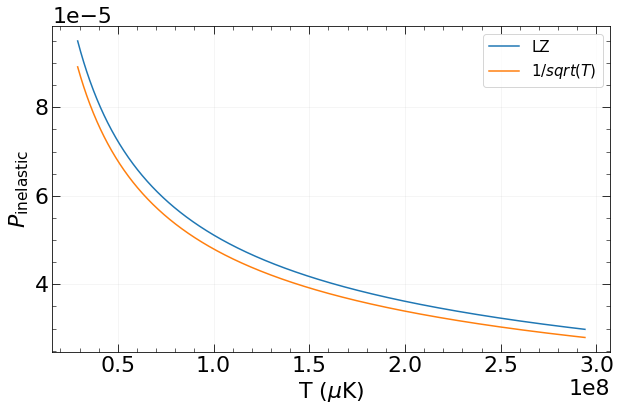

In [19]:
T=np.linspace(35-6,300-6,1000)
fig, ax = plt.subplots(figsize=(10, 6))
slope_parameter = 3e-17
ax.plot(T*1e6,lac.P_inelastic_blue_slope(slope_parameter,np.sqrt(cs.k_B*T/cs.Rb87_M), 1.3*cs.IsatD2, cs.muD2,Omega_factor=1/5), label = 'LZ')
ax.plot(T*1e6,1/np.sqrt(T)*4.8e-4,label = r'$1/sqrt(T)$')
plt.xlabel(r'T ($\mu$K)')
plt.ylabel(r'$P_{\mathrm{inelastic}}$');
# plt.ylim(0,1)
# ax.set_yscale('log')
plt.legend(fontsize=15)
# plt.title(r'$\Delta = 150$ MHz, $I=I_{sat}$',fontsize=18)

In [1326]:
4.5/2.1

2.142857142857143

In [1321]:
3.5/.5

7.0

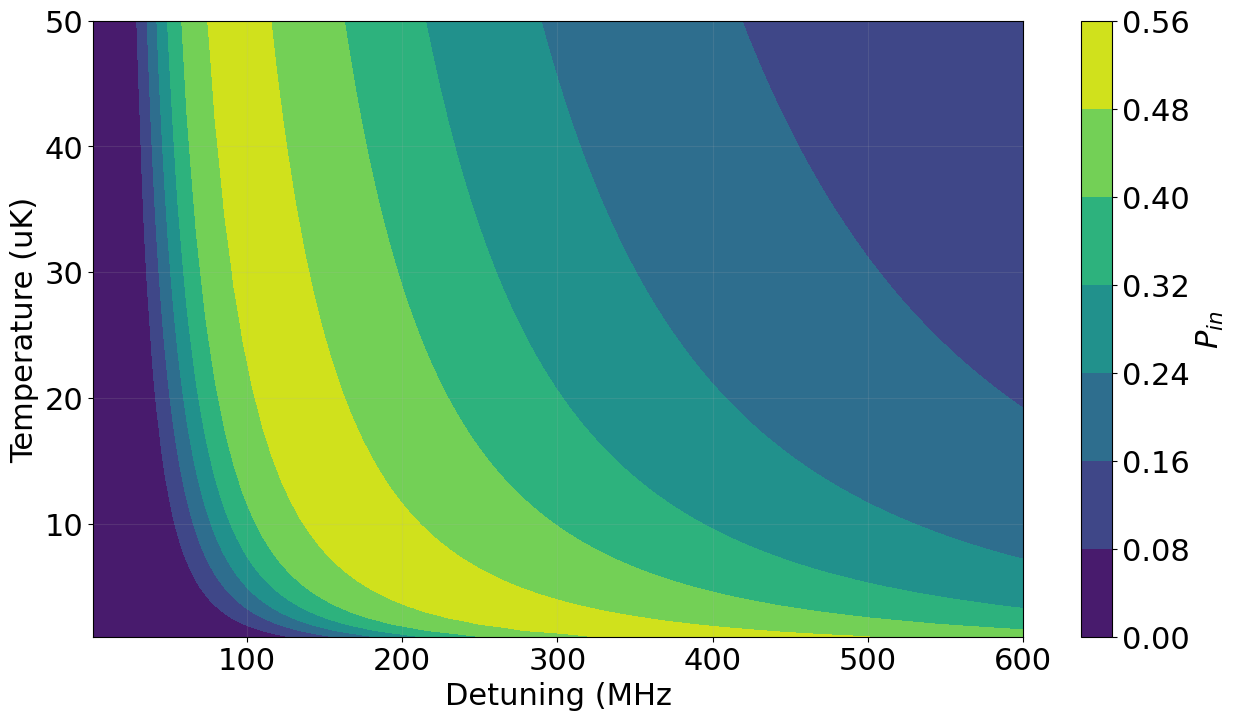

In [28]:
detuning_values = np.linspace(1, 600, 100)  # Adjust range accordingly
temperature_values = np.linspace(1e-6, 50e-6, 100)  # Adjust range accordingly

# Create arrays to store P_in values
P_in_values = np.zeros((len(temperature_values), len(detuning_values)))

# Calculate P_in for each combination of detuning and temperature
for i, T in enumerate(temperature_values):
    for j, delta in enumerate(detuning_values):
        P_in_values[i, j] = P_inelastic_blueLZ(T, IsatD1,muD1,delta)

# Create a 2D plot
fig = plt.figure(figsize=(15, 8))
plt.contourf(detuning_values, temperature_values*1e6, P_in_values, cmap='viridis')
plt.colorbar(label=r'$P_{in}$')
plt.xlabel('Detuning (MHz')
plt.ylabel('Temperature (uK)')
# plt.title(r'$P_{in}$ as a function of Detuning and Temperature')
plt.show()

### Inelastic Prob vs intensity

In [20]:
reload(lac)

<module 'Analysis_Python_Files.CollisionalAnalysis' from '/Users/stevenpampel/Documents/B232_Data_Analysis/Molecular_Potentials/../Analysis_Python_Files/CollisionalAnalysis.py'>

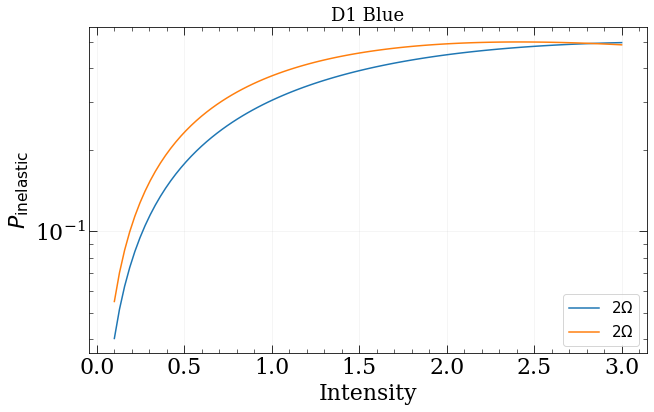

In [126]:
delta = np.linspace(1,1000,100)
temp = np.linspace(1e-6,100e-6,100)
I = np.linspace(0.1,3,100)
IsatD1 = cs.IsatD1
IsatD2 = cs.IsatD1
muD1=cs.muD1
muD2=cs.muD2

fig, ax = plt.subplots(figsize=(10, 6))
T=30e-6
ax.plot(I,lac.P_inelastic_blue(0.1,I*IsatD1,muD1,65,Omega_factor=1/5,C3_factor = 1),label = r'$2\Omega$')
ax.plot(I,lac.P_inelastic_blue(0.1,I*IsatD2,muD2,65,Omega_factor=1/6,C3_factor = 1),label = r'$2\Omega$')

ax.set_yscale('log')
# ax.plot(delta,lac.P_inelastic_blue(0.1,IsatD1,muD1,delta,Omega_factor=1),label = r'$\Omega$')
# ax.plot(delta,lac.P_inelastic_blue(0.1,IsatD1,muD1,delta,Omega_factor=1),label = r'$\Omega/2$')
# ax.plot(delta,lac.P_inelastic_blue(0.1,IsatD1,muD1,delta,Omega_factor=1),label = r'$\Omega/10$')
# ax.plot(delta,lac.P_inelastic_blue(0.1,IsatD1,muD1,delta,C3_factor = 2),label = r'$\Omega/100$')
plt.xlabel('Intensity')
plt.ylabel(r'$P_{\mathrm{inelastic}}$');
plt.title('D1 Blue',fontsize=18)
plt.legend(fontsize=15,loc=4)

Text(0.5, 1.0, '$\\Delta = 100$ MHz, $T=20 \\ \\mu K$')

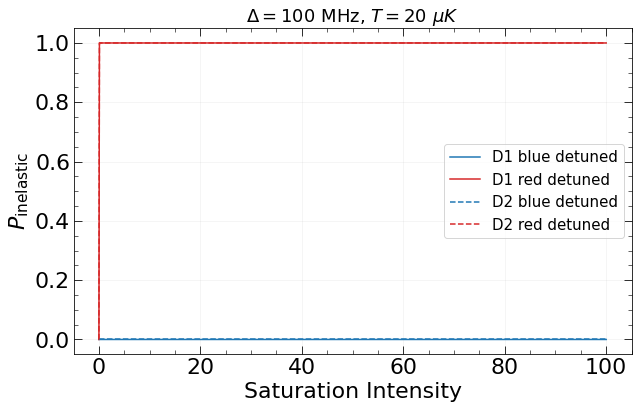

In [21]:
delta = 300
T=10e-6
IsatD1 = 44.84
IsatD2 = 25.03
ID1 = np.linspace(0,100,1000)
ID2 = np.linspace(0,100,1000)
muD1=2.537e-29
muD2=3.584e-29

fig, ax = plt.subplots(figsize=(10, 6))
matplotlib.rc('font', **font)
ax.plot(ID1,lac.P_inelastic_blue(T,ID1,muD1,delta), color = 'tab:blue',label = 'D1 blue detuned')
ax.plot(ID1,lac.P_inelastic_red(T,ID1,muD1,delta), color = 'tab:red',label = 'D1 red detuned')
ax.plot(ID1,lac.P_inelastic_blue(T,ID2,muD2,delta),linestyle = '--', color = 'tab:blue',label = 'D2 blue detuned')
ax.plot(ID1,lac.P_inelastic_red(T,ID2,muD2,delta),linestyle = '--', color = 'tab:red',label = 'D2 red detuned')
plt.xlabel(r'Saturation Intensity')
plt.ylabel(r'$P_{\mathrm{inelastic}}$');
plt.legend(fontsize=15)
plt.title(r'$\Delta = 100$ MHz, $T=20 \ \mu K$',fontsize=18)

In [39]:
reload(lac)

<module 'Analysis_Python_Files.CollisionalAnalysis' from '/Users/stevenpampel/Documents/B232_Data_Analysis/Molecular_Potentials/../Analysis_Python_Files/CollisionalAnalysis.py'>

### tolerance range

In [44]:
import numpy as np

def calculate_delta_R(alpha_RC, d2U_dR2_RC, delta, epsilon, hbar):
    """
    Calculate the tolerance range (Delta R) around the Condon radius where the Landau-Zener transition
    probability remains approximately constant within a specified tolerance epsilon.

    Parameters:
    alpha_RC (float): The slope parameter alpha at the Condon radius (|dU/dR| at R_C).
    d2U_dR2_RC (float): The second derivative of the potential energy difference at R_C (|d^2U/dR^2| at R_C).
    delta (float): The energy gap at the Condon radius.
    epsilon (float): The acceptable relative change in the transition probability.
    hbar (float): Reduced Planck constant.

    Returns:
    float: The tolerance range (Delta R) in the same units as R_C.
    """
    # Calculate the part of the denominator involving epsilon and the existing parameters
    denominator = hbar * np.log(epsilon) + (np.pi * delta**2) / alpha_RC
    
    # Check if the denominator is zero or negative which might indicate incorrect input or extreme cases
    if denominator <= 0:
        raise ValueError("Denominator in the Delta R calculation is non-positive. Check the input values.")

    # Calculate the new alpha at R_C + Delta R
    new_alpha = (np.pi * delta**2) / denominator
    
    # Calculate Delta R
    Delta_R = (new_alpha - alpha_RC) / d2U_dR2_RC
    
    return Delta_R

# Example usage
alpha_RC = 1e-18  # Example value for |dU/dR| at R_C in J/nm
d2U_dR2_RC = 1e-24  # Example value for |d^2U/dR^2| at R_C in J/nm^2
delta = 0.1e-21  # Energy gap in Joules
epsilon = 0.05  # 5% change in transition probability
hbar = 1.0545718e-34  # Reduced Planck constant in J*s

# Calculate Delta R
Delta_R = calculate_delta_R(alpha_RC, d2U_dR2_RC, delta, epsilon, hbar)
print(f"Tolerance range Delta R around Condon radius: {Delta_R:.4e} nm")


Tolerance range Delta R around Condon radius: 1.0056e-02 nm


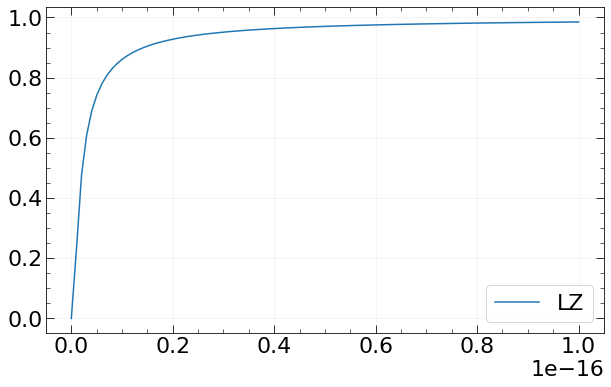

In [41]:
fig, ax = plt.subplots(figsize=(10, 6))

def tolerance(ratio,
ax.plot(alpha,lac.P_LZ_slope(alpha,.05, 1.3*cs.IsatD2, cs.muD2,Omega_factor=1/5), label = 'LZ')
ax.legend()



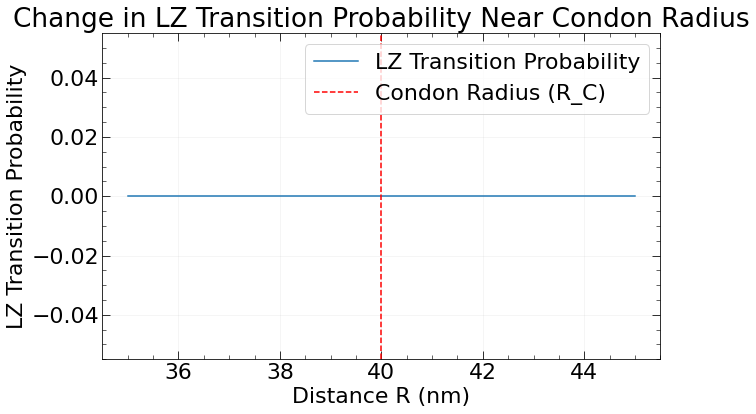

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
hbar = 1.0545718e-34  # J * s, Planck's constant
delta = 1e-21  # J, assumed constant energy gap
R_C = 40.0  # nm, Condon radius
alpha_initial = 1e-22  # J/nm, initial slope of the energy difference at R_C

# Define a range of R around R_C
R_values = np.linspace(R_C - 5, R_C + 5, 500)  # 5 nm on either side of R_C

# Assume alpha changes linearly around R_C based on a second derivative approximation
second_derivative = 1e-24  # J/nm^2, hypothetical value for d^2U/dR^2
alpha_values = alpha_initial + second_derivative * (R_values - R_C)

# Landau-Zener probability calculation
P_LZ = np.exp(-np.pi * delta**2 / (hbar * alpha_values))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(R_values, P_LZ, label='LZ Transition Probability')
plt.axvline(x=R_C, color='r', linestyle='--', label='Condon Radius (R_C)')
plt.xlabel('Distance R (nm)')
plt.ylabel('LZ Transition Probability')
plt.title('Change in LZ Transition Probability Near Condon Radius')
plt.legend()
plt.grid(True)
plt.show()


## trap volume 

In [ ]:
omega_radial = 100e3
print(np.sqrt(scc.k*20e-6/(87*scc.u*omega_radial**2)))
print(np.sqrt(2*cs.hbar/(87*scc.u*omega_radial)))

4.3719225947829473e-07
1.2082836488386228e-07


In [ ]:
omega_radial = 100e3
omega_axial = 25e3
omega_avg = (omega_radial**2*omega_axial)**(1/3)
print(2*cs.hbar*omega_avg/87*scc.u)
print(scc.k * 20e-6/ 87*scc.u)

2.536000459951013e-58
5.270394486809709e-57


In [27]:
V = lac.trapVolume(1e-3,300e-6)
V1 = lac.trap_volume(300e-6,2*np.pi*25e3,2*np.pi*130e3)
r = (3/4*V/np.pi)**(1/3)
r1 = (3/4*V1/np.pi)**(1/3)
print(r*1e9,r1*1e9)
print(V*1e18)

459.3429629362931 558.7487005918816
0.4059754871502237


### Anderson Beta

In [2]:
85/21

4.0476190476190474

In [45]:
def beta(beta_prime,trap_depth,T,waist): 
    KelvinToJoules = 1.380648780669e-23
    lmbda = 858e-9
    w_0 = waist # beam waist (radius)
    U = trap_depth*KelvinToJoules # depth in Joules
    w_r = np.sqrt(4*U/(cs.Rb87_M*w_0**2))# Hz
    w_a = w_r / (np.sqrt(2)*w_0*np.pi/lmbda) # Hz
    w = (w_r**2 * w_a)**(1/3)
    V = ((2*np.pi*cs.k_B * T/(cs.Rb87_M*w**2))**(3/2))
    # print('beta',beta,w_r/(2*np.pi),w_a/(2*np.pi))
    beta = beta_prime * 1e3 * 2 * np.sqrt(2) * V
    return w

In [49]:
w_r=135e3*2*np.pi
w_a = 25e3*2*np.pi
w = (w_r**2 * w_a)**(1/3)
print(w)

483484.3084705283


In [46]:
beta_prime_And = 0.02  # estimated from plot in dynamics paper
anderson = beta(.02,4e-3,200e-6,2e-6)
antoine = beta(1.2,1e-3,300e-6,1e-6)
print(anderson)
print(antoine)

283799.55418382026
357565.0322669758


In [53]:
ant = lac.betaCalc(1.2,0,483484.3084705283,0,300e-6,0)
ander =  lac.betaCalc(0.02,0,283799.55418382026,0,300e-6,0)
print(ander)

1.8951529866869384e-10


## scattering calculations

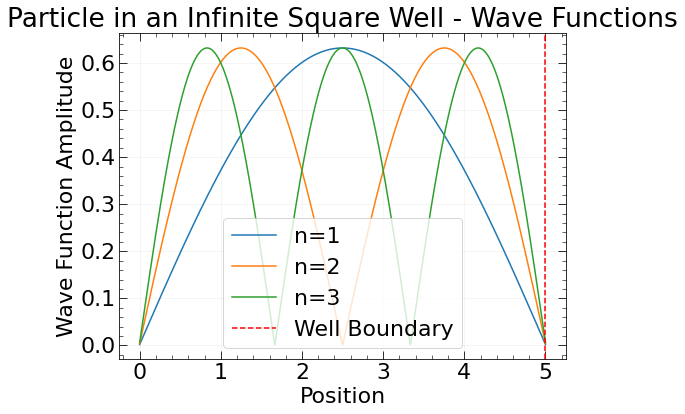

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def square_well_potential(x, L):
    return np.piecewise(x, [x < 0, (0 <= x) & (x <= L), x > L], [lambda x: np.inf, lambda x: 0, lambda x: np.inf])

def solve_schrodinger_equation(V, L, num_points):
    # Spatial grid
    x = np.linspace(0, L, num_points)

    # Discretization
    h = x[1] - x[0]

    # Kinetic energy operator
    T = -0.5 * (1 / h**2) * (np.diag(np.ones(num_points - 1), -1) - 2 * np.diag(np.ones(num_points), 0) + np.diag(np.ones(num_points - 1), 1))

    # Hamiltonian matrix
    H = T + np.diag(V(x, L))

    # Solve the eigenvalue problem
    eigenvalues, eigenvectors = np.linalg.eigh(H)

    return x, eigenvalues, eigenvectors

def plot_wavefunction(x, eigenvectors, num_to_plot, L):
    plt.figure(figsize=(8, 6))

    for i in range(num_to_plot):
        psi = eigenvectors[:, i]
        normalization = np.sqrt(np.trapz(np.abs(psi)**2, x))
        psi /= normalization
        plt.plot(x, np.abs(psi), label=f'n={i + 1}')

    plt.title('Particle in an Infinite Square Well - Wave Functions')
    plt.xlabel('Position')
    plt.ylabel('Wave Function Amplitude')
    plt.axvline(x=L, color='red', linestyle='--', label='Well Boundary')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    # Parameters
    L = 5.0  # Width of the well
    num_points = 1000  # Number of spatial grid points

    # Potential for infinite square well
    V = lambda x, L: square_well_potential(x, L)

    # Solve the Schrödinger equation
    x, eigenvalues, eigenvectors = solve_schrodinger_equation(V, L, num_points)

    # Plot the first few wave functions
    num_to_plot = 3
    plot_wavefunction(x, eigenvectors, num_to_plot, L)


/var/folders/p1/sslzk5t517d2pwp06md4xf_w0000gn/T/ipykernel_39304/3560506869.py:29: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



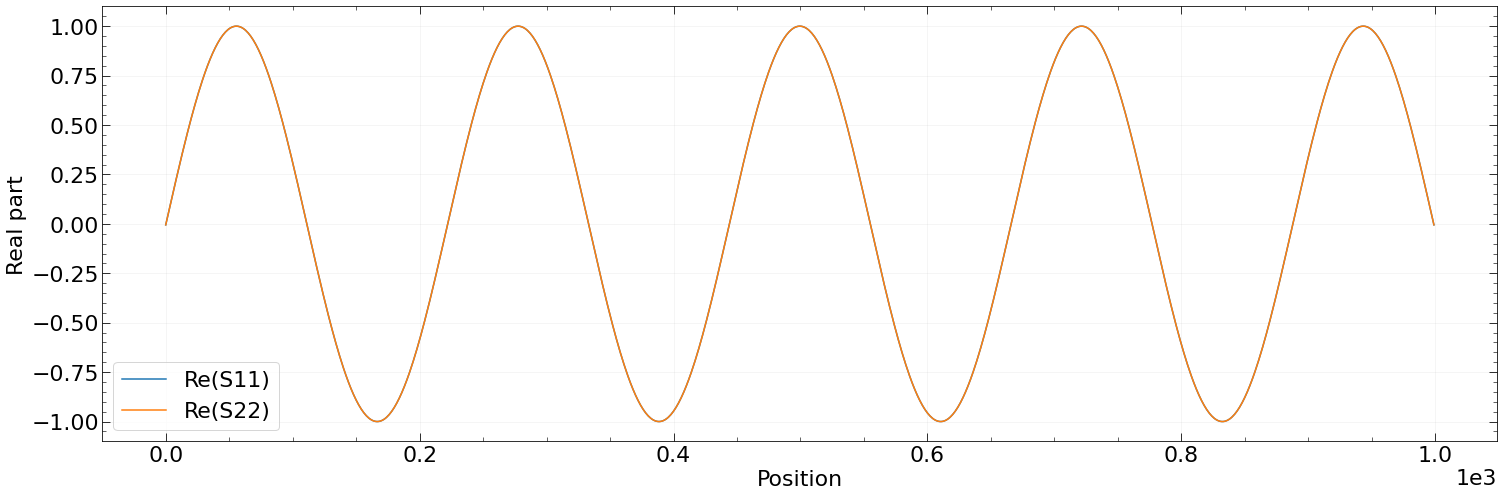

In [48]:
import numpy as np
import matplotlib.pyplot as plt

def potential_barrier(x):
    # Define a simple potential barrier function
    height = 5.0
    width = 2.0
    barrier = np.zeros_like(x)
    barrier[(x >= -width/2) & (x <= width/2)] = height
    return barrier

def calculate_s_matrix(energy, barrier_height):
    # Set up the parameters
    h_bar = 1.0  # Planck's constant divided by 2*pi (for simplicity)
    m = 1.0     # Particle mass

    # Define the potential barrier
    x = np.linspace(-10, 10, 1000)
    barrier = potential_barrier(x)

    # Calculate the transmission coefficient using the S-matrix formula
    k1 = np.sqrt(2 * m * energy) / h_bar
    k2 = np.sqrt(np.maximum(0, 2 * m * (energy - barrier_height))) / h_bar

    # Build the S-matrix
    s11 = np.exp(1j * (k1 - k2) * x)
    s22 = np.exp(-1j * (k1 + k2) * x)

    s_matrix = np.array([[s11, 0],
                         [0, s22]])

    return s_matrix

# Set the energy and barrier height
energy = 1.0
barrier_height = 2.0

# Calculate the S-matrix
s_matrix = calculate_s_matrix(energy, barrier_height)

# Plot the real parts of the S-matrix elements
plt.plot(np.real(s_matrix[0, 0]), label='Re(S11)')
plt.plot(np.real(s_matrix[1, 1]), label='Re(S22)')
plt.xlabel('Position')
plt.ylabel('Real part')
plt.legend()
plt.show()


### scattering rate calc

In [102]:
def scattering_rate(S,Gamma,Delta):
    return S*Gamma/2 * 1/(S+(2*Delta/Gamma)**2+1)


In [122]:
Delta = 2*np.pi*e6
tau = 27.7e-9
Gamma = 1/tau
S=1.3
recoil_temp = 348.66e-9
R = scattering_rate(S,Gamma,Delta)
print(R)
print(recoil_temp*R)

300732.5233403204
0.10485340158783611


In [99]:
cs.Rb87_D1LineFrequency

377107463500000.0

In [120]:
1/27.7e-9

36101083.032490976

## Dipole-Dipole Interaction Potential 

The dipole-dipole interaction potential describes the interaction energy between two electric dipoles $\vec{d}_1 $and $\vec{d}_2$ separated by a distance $\vec{r}$.

The potential $\phi(\vec{r})$ at a point $\vec{r}$ due to dipole $\vec{d}_1$ located at the origin is given by:

$ \phi(\vec{r}) = \frac{\vec{d}_1 \cdot \vec{r}}{r^3} \implies  \vec{E}(\vec{r}) = -\nabla \phi(\vec{r}) =  \left[ \frac{3(\vec{d}_1 \cdot \vec{r}) \vec{r}}{r^5} - \frac{\vec{d}_1}{r^3} \right] $

The interaction energy $U$ of a dipole $\vec{d}_2$ in the electric field $\vec{E}_1$ created by another dipole $\vec{d}_1$ is:

$ U = -\vec{d}_2 \cdot \vec{E}_1 \implies U = -\vec{d}_2 \cdot \left[ \frac{3(\vec{d}_1 \cdot \vec{r}) \vec{r}}{r^5} - \frac{\vec{d}_1}{r^3} \right] $

Simplifying the dot products, we get:

$ U = \left[ \frac{(\vec{d}_1 \cdot \vec{d}_2)}{r^3} - \frac{3(\vec{d}_1 \cdot \vec{r})(\vec{d}_2 \cdot \vec{r})}{r^5} \right]= \frac{1}{r^3} \left[ \vec{d}_1 \cdot \vec{d}_2 - 3(\vec{d}_1 \cdot \hat{r})(\vec{d}_2 \cdot \hat{r}) \right] $

Taking $\hat z$ as the internuclear axis:

$U = \frac{1}{r^3} \left[ \vec{d}_1 \cdot \vec{d}_2 - 3(\vec{d}_1 \cdot \hat{z})(\vec{d}_2 \cdot \hat{z}) \right] \\
\ \ \ \  = \frac{1}{ r^3} \left( d_{1x}d_{2x}  + d_{1y} d_{2y}-2d_{1z}d_{2z} \right)$

In the spherical basis:

$d_x=-\frac{1}{\sqrt{2}}\left(d^{+}-d^{-}\right) \quad d_y=\frac{i}{\sqrt{2}}\left(d^{+}+d^{-}\right) \quad d_z=d^0 \\
 U=\left[-\frac{1}{\sqrt{2}}\left(d_1^{+}-d_1^{-}\right)\right]\left[-\frac{1}{\sqrt{2}}\left(d_2^{+}-d_2^{-}\right)\right] {\left[\frac{1}{\sqrt{2}}\left(d_1^{+}+d_1^{-}\right)\right]\left[\frac{1}{\sqrt{2}}\left(d_2^{+}+d_2^{-}\right)\right]-2 d_1^0 d_2^0} \\ 
 \ \ \ \ = -d_1^+d_2^- - d_1^-d_2^+ - 2d_1^0d_2^0
$


#### deriving electric dipole selection rules in the spherical basis
For a single dipole, this is related to spherical harmonics through

$ \hat{V}_{\text{d}}^{\nu} = \sum_{\nu} C_{\nu} \sqrt{\frac{4 \pi}{3}} r Y_{1 \nu}(\theta,\phi)$

Using this relation, we can calculate the matrix element of the dipole operator for an initial state $|n_i l_i m_{l_i} \rangle $ and final state $|n_f l_f m_{l_f} \rangle $:

$\begin{aligned}
& \hat{d}_{f i}^{(\nu)}=-q\left\langle n_f l_f m_{l_f}|\hat{r}| n_i l_i m_{l_i}\right\rangle \sqrt{\frac{4 \pi}{3}} \int d \Omega Y_{l_f m_{l_f}}^* Y_{1 \nu} Y_{l_i i m} \\
& =-r(n)q\left\langle l_f|\hat{r}| l_i \right\rangle \sqrt{\frac{4 \pi}{3}} \sqrt{\frac{3}{4 \pi}} \sqrt{\left(2 l_f+1\right)\left(2 l_i+1\right)}\left(\begin{array}{ccc}
1 & l_i & l_f \\
\nu & m_i & -m i
\end{array}\right)\left(\begin{array}{lll}
1 & l_i & l_f \\
0 & 0 & 0
\end{array}\right) \\
&
\end{aligned}$

The first Wigner 3j is only non-zero when

$m_i-m_f+\nu = 0 \ \implies \Delta m = m_f-m_i = \nu = 0, \pm1$ 

and for $|l_i-1| \leq l_f \leq | l_i+1|$

However, the second Wigner 3j is only non-zero when $l_f \neq l_i$, therefore

$\Delta l = l_f-l_i = \pm 1$

Applying this to $\hat{d}_{f i}^{(\nu)}$ we get

$\hat{d}_{f i}^{(\nu)} = \begin{cases} 
d, & \text{if }  \, |l_f - l_i| = 1, \, |m_i - m_f + \nu| = 0 \\
0, & \text{otherwise}
\end{cases} \ \ \ \ \ \ $ 

where $d  = \langle l_f|\hat{r}| l_i \rangle$ is the reduced radial matrix element.

#### the resonant dipole wavefunction
The electronic basis states with well-defined inversion and permutation symmetry are given as 

$\begin{aligned}
\Psi_{\mathrm{el}}=\frac{1}{2} & {\left[S^A(1) P_{\Lambda}^B(2)+(-1)^S S^A(2) P_{\Lambda}^B(1)+(-1)^{w+1} S^B(1) P_{\Lambda}^A(2)\right.}  \left.+(-1)^{S+w+1}S^B(2) P_{\Lambda}^A(1)\right]
\end{aligned}$

$ \ \ \ \ \ \ \ = \frac{1}{2}\left[|\phi_{12}^{A_sB_p} \rangle + (-1)^S |\phi_{21}^{A_sB_p} \rangle + (-1)^{w+1}|\phi_{12}^{B_sA_p} \rangle + (-1)^{S+w+1} |\phi_{21}^{B_sA_p} \rangle \right ] \ \ $

where $ \ \ |\phi_{nm}^{i_s j_p} \rangle = S^i(n) P_{\Lambda}^j(m) = |l_i=0, \lambda_i=0 \rangle_n \otimes |l_j=1, \lambda_j \rangle_m = |0 0 1 \lambda_j \rangle $.

Here $w$ is the inversion symmetry quantum number where $w=0$ for gerade states and $w=1$ for undgerade. $S$ is the total spin, which in this case can be 0 for singlet and 1 for triplet.
#### Calculating the matrix elements
Calculating the expression, we get

$\langle \Psi_{\mathrm{el}}|V_{dd}|\Psi_{\mathrm{el}} \rangle
= \frac{1}{4R^3} \left [ 
\langle \phi_{12}^{A_sB_p} |V_{dd}|\phi_{12}^{A_sB_p} \rangle 
+ (-1)^S{\langle \phi_{12}^{A_sB_p}}| V_{dd} | \phi_{21}^{A_sB_p} \rangle \\
 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ + (-1)^{w+1}{\langle \phi_{12}^{A_sB_p}}| V_{dd} | \phi_{12}^{B_sA_p} \rangle 
 + (-1)^{S+w+1}{\langle \phi_{12}^{A_sB_p}}| V_{dd} | \phi_{21}^{B_sA_p} \rangle \\ 
 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ + (-1)^{S}{\langle \phi_{21}^{A_sB_p}}| V_{dd} |\phi_{12}^{A_sB_p} \rangle 
+ (-1)^{2S}{\langle \phi_{21}^{A_sB_p}}| V_{dd} | \phi_{21}^{A_sB_p} \rangle \\
 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ + (-1)^{w+1+S}{\langle \phi_{21}^{A_sB_p}}| V_{dd} | \phi_{12}^{B_sA_p} \rangle 
+ (-1)^{2S+w+1}{\langle \phi_{21}^{A_sB_p}}| V_{dd} | \phi_{21}^{B_sA_p} \rangle \\ 
 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ + (-1)^{w+1}{\langle \phi_{12}^{B_sA_p}}| V_{dd} |\phi_{12}^{A_sB_p} \rangle 
+ (-1)^{w+1+S}{\langle \phi_{12}^{B_sA_p}}| V_{dd} | \phi_{21}^{A_sB_p} \rangle \\
 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ + (-1)^{w+w+2}{\langle \phi_{12}^{B_sA_p}}| V_{dd} | \phi_{12}^{B_sA_p} \rangle 
+ (-1)^{2w+S+2}{\langle \phi_{12}^{B_sA_p}}| V_{dd} | \phi_{21}^{B_sA_p} \rangle \\
 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ + (-1)^{S+w+1}{\langle \phi_{21}^{B_sA_p}}| V_{dd} |\phi_{12}^{A_sB_p} \rangle 
+ (-1)^{2S+w+1 }{\langle \phi_{21}^{B_sA_p}}| V_{dd} | \phi_{21}^{A_sB_p} \rangle \\
 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ + (-1)^{S+2w+2}{\langle \phi_{21}^{B_sA_p}}| V_{dd} | \phi_{12}^{B_sA_p} \rangle 
+ (-1)^{2S+2w+2}{\langle \phi_{21}^{B_sA_p}}| V_{dd} | \phi_{21}^{B_sA_p} \rangle  \right ]$



Discarding the 8 terms containing matrix elements where $l_f=l_i$ (i.e $n',m'=n,m$):

$\langle \Psi_{\mathrm{el}}|V_{dd}|\Psi_{\mathrm{el}} \rangle
= \frac{e^2}{4R^3} \left [ + (-1)^S{\langle \phi_{12}^{A_sB_p}}| V_{dd} | \phi_{21}^{A_sB_p} \rangle 
+ (-1)^{S+w+1}{\langle \phi_{12}^{A_sB_p}}| V_{dd} | \phi_{21}^{B_sA_p} \rangle \\ 
 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ + (-1)^{S}{\langle \phi_{21}^{A_sB_p}}| V_{dd} |\phi_{12}^{A_sB_p} \rangle 
+ (-1)^{w+1+S}{\langle \phi_{21}^{A_sB_p}}| V_{dd} | \phi_{12}^{B_sA_p} \rangle \\ 
 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ + (-1)^{w+1+S}{\langle \phi_{12}^{B_sA_p}}| V_{dd} | \phi_{21}^{A_sB_p} \rangle 
+ (-1)^{2w+S+2}{\langle \phi_{12}^{B_sA_p}}| V_{dd} | \phi_{21}^{B_sA_p} \rangle \\
 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ + (-1)^{S+w+1}{\langle \phi_{21}^{B_sA_p}}| V_{dd} |\phi_{12}^{A_sB_p} \rangle 
+ (-1)^{S+2w+2}{\langle \phi_{21}^{B_sA_p}}| V_{dd} | \phi_{12}^{B_sA_p} \rangle 
 \right ]$



$= \frac{1}{4 R^3} \left [(-1)^S \langle 001 \Lambda |V_{dd} |1 \Lambda 00 \rangle 
 + (-1)^{S+w+1}\langle 001 \Lambda |V_{dd}|1 \Lambda 00 \rangle  \\ 
 \ \ \ \ \ \ \ \ \ \ \ \ + (-1)^{S} \langle 1 \Lambda 00|v_{dd}|001 \Lambda \rangle + (-1)^{w+1+S}\langle 1 \Lambda 00|V_{dd}|001 \Lambda \rangle \\
 \ \ \ \ \ \ \ \ \ \ \ \ + (-1)^{w+1+S} \langle 001 \Lambda |V_{dd}|1 \Lambda 00 \rangle
+ (-1)^{w+S+w+2} \langle 001 \Lambda |V_{dd}|1 \Lambda 00 \rangle \\
 \ \ \ \ \ \ \ \ \ \ \ \ + (-1)^{S+w+1} \langle 1 \Lambda 00 |V_{dd}|00 1 \Lambda\rangle
 + (-1)^{S+w+w+2} \langle 1 \Lambda 00 |V_{dd}|001 \Lambda \rangle \right ]
$


$= \frac{1}{4 R^3} \left [ (-1)^S  + 2(-1)^{S+w+1} + (-1)^{2w+S+2} \right ]
\left [ \langle 001 \Lambda |V_{dd} |1 \Lambda 00 \rangle +\langle 1 \Lambda 00|v_{dd}|001 \Lambda \rangle ] 
\right ]
$


In [1253]:

# define dipole transition selection rules
def DM(nu, lf, mf, li, mi):
    return 1 if abs(lf - li) == 1 and abs(mi - mf + nu) == 0 else 0
   
def VDD(w, S, Lambda):
    a = (-1)**(S)+2*(-1)**(S+w+1)+(-1)**(2*w+S+2)
    # a = 2*(-1)**(S+w+1)
    b = -DM(1, 0,0,1,Lambda)*DM(-1, 1,Lambda,0,0)-DM(-1, 0,0,1,Lambda)*DM(1, 1,Lambda,0,0)-2*DM(0, 0,0,1,Lambda)*DM(0, 1,Lambda,0,0)
    c = -DM(1,1,Lambda,0,0)*DM(-1,0,0,1,Lambda)-DM(-1,1,Lambda,0,0)*DM(1,0,0,1,Lambda)-2*DM(0,1,Lambda,0,0)*DM(0,0,0,1,Lambda)  
    return a,b,c,a/4*(b+c)

#### For $^{1} {\Sigma_{g}^{+}}' $$ ^{1} \Sigma_{g}^{+} $ : $ \ \ \  \Lambda = 0, S = 0, w = 0$

In [1254]:
w = 0;  S = 0; Lambda = 0; 
VDD(w,S,Lambda)

(-1, -2, -2, 1.0)

In [1255]:
w = 0;  S = 0; Lambda = 1; 
VDD(w,S,Lambda)

(-1, -1, -1, 0.5)

Evaluating the above function in the form $V_{dd}^{\nu=1} + V_{dd}^{\nu=-1} -  2V_{dd}^{\nu=0}$ for the quantum nuMers associated with each state, we get the expected results:

$\langle \Psi_{\mathrm{el}}'|V_{dd}|\Psi_{\mathrm{el}} \rangle
= \frac{e^2}{4 \pi \epsilon_{0} R^3} d^2 \begin{cases} 
2, & \text{for } ^{1} {\Sigma_{g}^{+}}' ^{1} \Sigma_{g}^{+} , ^{3}{\Sigma_{u}^{+}}' ^{3} \Sigma_{u}^{+} \\
-2,  & \text{for } ^{3} {\Sigma_{g}^{+}}' ^{3} \Sigma_{g}^{+} , ^{1}{\Sigma_{u}^{+}}' ^{1} \Sigma_{u}^{+} \\
-1, & \text{for } ^{1} {\Pi_{g}^{+}}' ^{1} \Pi_{g}^{+} , ^{3}{\Pi_{u}^{+}}' ^{3} \Pi_{u}^{+} \\
1,  & \text{for } ^{1} {\Pi_{g}^{+}}' ^{1} \Pi_{g}^{+} , ^{3}{\Pi_{u}^{+}}' ^{3} \Pi_{u}^{+} \\
0, & \text{otherwise}
\end{cases} \ \ \ \ \ \ $ 

where $\frac{e^2}{4 \pi \epsilon_{0}} d^2 = C_3$

As it turns out, all of the terms that include the wavefunction components that Paul omits

$(-1)^S S^A(2) P_{\Lambda}^B(1)+(-1)^{w+1} S^B(1) P_{\Lambda}^A(2)$

end up being zero. So only 4 out of the twelve terms above are needed. 

In [60]:
1-(1/(1+(.03/(2*np.pi*.0057)**2)))

0.9589979227255007

27.700831024930743

## theory of laser-induced collisions expression

$\langle S^A(1) P_{\Lambda}^B(2)|V_{dd}|S^B(2) P_{\Lambda}^A(1) \rangle
= \begin{cases} 
-2d^2/R^3, & \text{if }  \, \Lambda = 0 \\
d^2/R^3, & \text{of } \Lambda = \pm1
\end{cases} \ \ \ \ \ \ $ 

in ket notation

$S^A(1) P_{\Lambda}^B(2) = |001\Lambda \rangle \ \ \ \ \ $
$S^B(2) P_{\Lambda}^A(1) = |1\Lambda 00 \rangle$

need to calculate

$\langle S^A(1) P_{\Lambda}^B(2)|V_{dd}|S^B(2) P_{\Lambda}^A(1) \rangle = 
\langle 001\Lambda|V_{dd}|1\Lambda 00 \rangle$


where $V_{dd} = \frac{q^2}{r^3} \left[ \vec{r}_1 \cdot \vec{r}_2 - 3(\vec{r}_1 \cdot \hat{z})(\vec{r}_2 \cdot \hat{z}) \right]  = \frac{q^2}{r^3} \left( r_{1x}r_{2x}  + r_{1y} r_{2y}-2r_{1z}r_{2z} \right) \\
$






In [ ]:
def DM(nu, lf, mf, li, mi):
    return 1 if abs(lf - li) == 1 and mi - mf + nu == 0 else 0
      
def VDD(Lambda):
    DMS = -DM(1, 0,0,1,Lambda)*DM(-1, 1,Lambda,0,0)-DM(-1, 0,0,1,Lambda)*DM(1, 1,Lambda,0,0)-2*DM(0, 0,0,1,Lambda)*DM(0, 1,Lambda,0,0)
    return DMS

In [ ]:
Lambda = 0
VDD(Lambda)

-2

In [ ]:
Lambda = -1
VDD(Lambda)

-1

## RMP expression


Taking $\hat z$ as the internuclear axis:

$U = \frac{1}{r^3} \left[ \vec{d}_1 \cdot \vec{d}_2 - 3(\vec{d}_1 \cdot \hat{z})(\vec{d}_2 \cdot \hat{z}) \right] \\
\ \ \ \  = \frac{1}{ r^3} \left( d_{1x}d_{2x}  + d_{1y} d_{2y}-2d_{1z}d_{2z} \right)$

In the spherical basis:

$d_x=-\frac{1}{\sqrt{2}}\left(d^{+}-d^{-}\right) \quad d_y=\frac{i}{\sqrt{2}}\left(d^{+}+d^{-}\right) \quad d_z=d^0 \\
 U=\left[-\frac{1}{\sqrt{2}}\left(d_1^{+}-d_1^{-}\right)\right]\left[-\frac{1}{\sqrt{2}}\left(d_2^{+}-d_2^{-}\right)\right] {\left[\frac{1}{\sqrt{2}}\left(d_1^{+}+d_1^{-}\right)\right]\left[\frac{1}{\sqrt{2}}\left(d_2^{+}+d_2^{-}\right)\right]-2 d_1^0 d_2^0} \\ 
 \ \ \ \ = -d_1^+d_2^- - d_1^-d_2^+ - 2d_1^0d_2^0$

$|L,\Lambda,S,w \rangle = \frac{1}{\sqrt{2}} \left(|001\Lambda \rangle + \beta|1 \Lambda 00 \rangle \right )$ 

$\langle L,\Lambda,S,w |V_{dd}|L,\Lambda,S,w \rangle = \\ 
 \ \ \ \ \ \ \frac{1}{2} \left [
\langle 001 \Lambda |V_{dd}|001\Lambda \rangle  +
\beta \langle 001 \Lambda |V_{dd}|1 \Lambda 00 \rangle  \\
\ \ \ \ \ \ \ \ \ \ \ \ + \beta \langle 1 \Lambda 00 |V_{dd}|00 1 \Lambda \rangle + \beta^2 \langle 1 \Lambda 00 |V_{dd}| 1 \Lambda 00 \rangle \right ] \\
= \frac{1}{2} \beta \left [\langle 001 \Lambda |V_{dd}|1 \Lambda 00 \rangle +
\langle 1 \Lambda 00 |V_{dd}|00 1 \Lambda \rangle \right ] 
$

$ = \frac{1}{2} \beta \left [-\langle 00 | d_1^+|1 \Lambda \rangle \langle 1 \Lambda|d_2^-|00\rangle 
- \langle 00 | d_1^-|1 \Lambda \rangle \langle 1 \Lambda|d_2^+|00\rangle 
-2\langle 00 | d_1^0|1 \Lambda \rangle \langle 1 \Lambda|d_2^0|00\rangle\\
\ \ \ \ \ \ \ -\langle 1 \Lambda | d_1^+|00 \rangle \langle 00 |d_2^-|1 \Lambda\rangle 
- \langle 1 \Lambda | d_1^-|00 \rangle \langle 00|d_2^+|1 \Lambda\rangle 
-2\langle 1 \Lambda | d_1^0|00 \rangle \langle 00|d_2^0|1 \Lambda\rangle \right ]$

$= (-1)^{|\Lambda|+w+S} \left (2- |\Lambda| \right)\frac{d^2}{r^3}$

In [1230]:
def DM(nu, lf, mf, li, mi):
    return 1 if abs(lf - li) == 1 and mi - mf + nu == 0 else 0
      
def VDD(Lambda,S,w):
    DMS1 = -DM(1, 0,0,1,Lambda)*DM(-1, 1,Lambda,0,0)-DM(-1, 0,0,1,Lambda)*DM(1, 1,Lambda,0,0)-2*DM(0, 0,0,1,Lambda)*DM(0, 1,Lambda,0,0)
    DMS2 = -DM(1,1,Lambda,0,0)*DM(-1,0,0,1,Lambda)-DM(-1,1,Lambda,0,0)*DM(1,0,0,1,Lambda)-2*DM(0,1,Lambda,0,0)*DM(0,0,0,1,Lambda) 
    beta = (-1)**(S+w+1)
    return 1/2*beta*(DMS1+DMS2)

#### For $^{1} {\Sigma_{g}^{+}}' $$ ^{1} \Sigma_{g}^{+} $ : $ \ \ \  \Lambda = 0, S = 0, w = 0$

In [1231]:
Lambda = 0; S = 0;  w = 0;  
VDD(Lambda,S,w)

2.0

#### For $^{3} {\Sigma_{g}^{+}}' $$ ^{3} \Sigma_{g}^{+} $ : $ \ \ \  \Lambda = 0, S = 1, w = 0$

In [1232]:
Lambda = 0; S = 1;  w = 0;  
VDD(Lambda,S,w)

-2.0

#### For $^{3} {\Sigma_{u}^{+}}' $$ ^{3} \Sigma_{u}^{+} $ : $ \ \ \  \Lambda = 0, S = 1, w = 1$

In [1233]:
Lambda = 0; S = 1;  w = 1;  
VDD(Lambda,S,w)

2.0

#### For $^{1} {\Sigma_{u}^{+}}' $$ ^{1} \Sigma_{u}^{+} $ : $ \ \ \  \Lambda = 0, S = 0, w = 1$

In [1234]:
Lambda = 0; S = 0;  w = 1;  
VDD(Lambda,S,w)

-2.0

$^{1} \Pi_{u} $$ ^{1} \Pi_{u}$

In [1235]:
Lambda = 1; S = 0;  w = 0;  
VDD(Lambda,S,w)

1.0

$^{1} \Pi_{g} $$ ^{1} \Pi_{g}$

In [1236]:
Lambda = 1; S = 1;  w = 0;  
VDD(Lambda,S,w)

-1.0

$^{3} \Pi_{u} $$ ^{3} \Pi_{u}$

In [1237]:
Lambda = 1; S = 1;  w = 1;  
VDD(Lambda,S,w)

1.0

$^{3} \Pi_{g} $$ ^{3} \Pi_{g}$

In [1238]:
Lambda = 1; S = 1;  w = 0;  
VDD(Lambda,S,w)

-1.0

# Burke's expression

In [920]:
def DM(nu, lf, mf, li, mi):
    return 1 if abs(lf - li) == 1 and mi - mf + nu == 0 else 0
      
def VDD(nu, M_p, la_p, lb_p, M, la, lb):
    mb_p = 0
    ma = 0
    result = DM(nu,1,mb_p,0,0)+DM(nu,0,0,1,ma)
    return result

In [901]:
M = 0; la = 1; lb = 0; # initial state
Mp = 0; la_p = 0; lb_p =1; # final state
VDD(1, Mp, la_p, lb_p, M, la, lb)+ VDD(-1,Mp, la_p, lb_p, M, la, lb)+ VDD(0,Mp, la_p, lb_p, M, la, lb)

0

<Figure size 30000x9600 with 0 Axes>

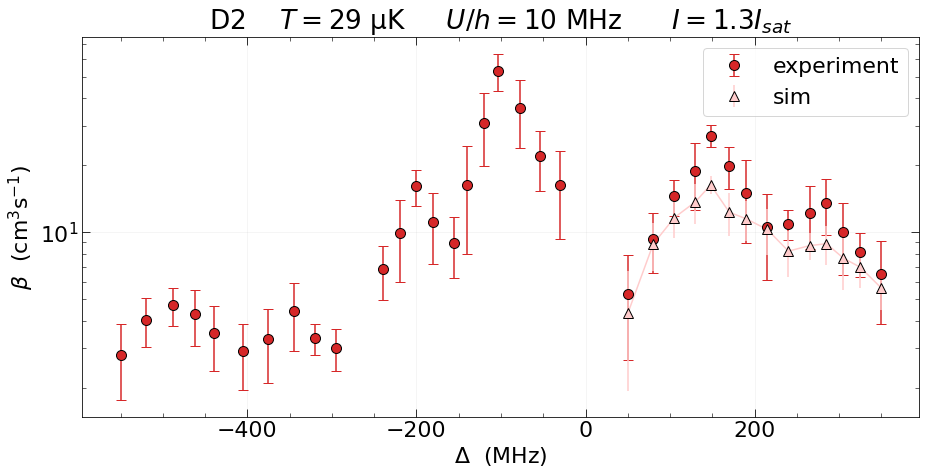

In [104]:
beta_data = np.loadtxt('betaD2.csv', delimiter=',', skiprows=1)
two_body_loss_count_D2F22_blue = [0.001, 0.0064, 0.0096, 0.0066, 0.0058]
two_body_loss_count_D2F23_red = [ 0.002, 0.007, 0.018, 0.009, 0.007, 0.002]

detuning_D2F22_red = beta_data[:, 0][5:10]
beta_D2F22_red = beta_data[:, 1][0:7]
detuning_D2F22_blue = beta_data[:, 0][10:15]
beta_D2F22_blue = beta_data[:, 1][7:14]
detuning_D2F23_red = beta_data[:, 0][15:21]
beta_D2F23_red = beta_data[:, 1][14:25]
detuning_D2F23_blue = beta_data[:, 0][21:35]
beta_D2F23_blue = beta_data[:, 1][25:33]

plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

plt.rc('font', **font)
fig, ax1 = plt.subplots(figsize=(15, 7))
scale_fact = .35e4

color1 = 'tab:red'
lightred = (1.0, 0.8, 0.8)
ax1.errorbar(beta_data[:,0], beta_data[:,1]*1e11, xerr=None, yerr=[beta_data[:,2]*1e11, beta_data[:,3]*1e11], ls='none', ecolor=color1, marker='o', markersize=10,
            markerfacecolor=color1, markeredgecolor='k', capsize=5,label='experiment')


sim_DF23_blue = [0.0012322298137280893, 0.00252398112532953, 0.0033197886615179382, 0.003913103833990094, 0.004659473278207485, 0.003513071590466945, 0.003281672322328324, 0.0029380023406460455, 0.0023473543091225577, 0.0024861426241816055, 0.0025355139169092713, 0.002183129021160462, 0.001986708001890476, 0.0016003504175969856]
sim_DF23_blue_err = [0.0006796866579400219, 0.0006195043075058494, 0.0006402714991167659, 0.0008093504622635343, 0.0004324608728547338, 0.000760558763733709, 0.0006730238084209461, 0.0006756108094034633, 0.0005435734759327187, 0.0003465785735812326, 0.0005052533957582655, 0.0006125363920252461, 0.0003822745732819524, 0.0003230356287166961]


### D2 F=2-3 blue
detunings_D2F23blue = [0.05, 0.08, 0.105, 0.13, 0.148, 0.17, 0.19, 0.215, 0.24, 0.265, 0.285, 0.305, 0.325, 0.350]
detunings_D2F23blue_Mhz = [i*1e3 for i in detunings_D2F23blue]
ax1.plot(detunings_D2F23blue_Mhz, np.array(sim_DF23_blue)*scale_fact, color=lightred)
ax1.errorbar(detunings_D2F23blue_Mhz, np.array(sim_DF23_blue)*scale_fact, yerr=np.array(sim_DF23_blue_err)*scale_fact,markeredgecolor='k', fmt='^', markersize=10, label='sim',color=lightred)



# # # F21 red
# x_smooth_D2F22_red = np.linspace(detuning_D2F22_red.min(), detuning_D2F22_red.max(), 300)
# spl_D2F22_red = make_interp_spline(detuning_D2F22_red, np.array(two_body_loss_count_D2F22_red)*40e-9, k=2)
# y_smooth_D2F22_red = spl_D2F22_red(x_smooth_D2F22_red)
# ax1.plot(x_smooth_D2F22_red, y_smooth_D2F22_red,color=lightred)

# # # F21 blue
# x_smooth_D2F22_blue = np.linspace(detuning_D2F22_blue.min(), detuning_D2F22_blue.max(), 300)
# spl_D2F22_blue = make_interp_spline(detuning_D2F22_blue, np.array(two_body_loss_count_D2F22_blue)*15e-9, k=2)
# y_smooth_D2F22_blue = spl_D2F22_blue(x_smooth_D2F22_blue)
# ax1.plot(x_smooth_D2F22_blue, y_smooth_D2F22_blue,color=lightred)

# # F22 red
# x_smooth_D2F23_red = np.linspace(detuning_D2F23_red.min(), detuning_D2F23_red.max(), 300)
# spl_D2F23_red = make_interp_spline(detuning_D2F23_red, np.array(two_body_loss_count_D2F23_red)*30e-9, k=2)
# y_smooth_D2F23_red = spl_D2F23_red (x_smooth_D2F23_red)
# ax1.plot(x_smooth_D2F23_red, y_smooth_D2F23_red,color=lightred)

# # # F22 blue
# x_smooth_D2F23_blue = np.linspace(detuning_D2F23_blue.min(), detuning_D2F23_blue.max(), 300)
# spl_D2F23_blue = make_interp_spline(detuning_D2F23_blue, np.array(two_body_loss_count_D2F23_blue)*23e-9, k=2)
# y_smooth_D2F23_blue = spl_D2F23_blue(x_smooth_D2F23_blue)
# ax1.plot(x_smooth_D2F23_blue, y_smooth_D2F23_blue,color=lightred)

# ax1.plot(detuning_D2F22_red, np.array(two_body_loss_count_D2F22_red)*40e-9, color=lightred)
# ax1.plot(detuning_D2F22_blue, np.array(two_body_loss_count_D2F22_blue)*15e-9, color=lightred)
# ax1.plot(detuning_D2F23_red, np.array(two_body_loss_count_D2F23_red)*30e-9, color=lightred)
# ax1.plot(detuning_D2F23_blue, np.array(two_body_loss_count_D2F23_blue)*23e-9, color=lightred)



# ax1.scatter(detuning_D2F22_red, np.array(two_body_loss_count_D2F22_red)*40e-9, color=lightred, marker = '^',s = 200,label='simulation')
# ax1.scatter(detuning_D2F22_blue, np.array(two_body_loss_count_D2F22_blue)*15e-9, color=lightred,marker = '^',s = 200)
# ax1.scatter(detuning_D2F23_red, np.array(two_body_loss_count_D2F23_red)*30e-9, color=lightred,marker = '^',s = 200)
# ax1.scatter(detuning_D2F23_blue, np.array(two_body_loss_count_D2F23_blue)*23e-9, color=lightred,marker = '^',s = 200)

# ax1.scatter(detuning_D2F22_red, np.array(two_body_loss_count_D2F22_red)*10e-9, color='red', marker = '^',s = 200,label='unscaled')
# ax1.scatter(detuning_D2F22_blue, np.array(two_body_loss_count_D2F22_blue)*10e-9, color='red',marker = '^',s = 200)
# ax1.scatter(detuning_D2F23_red, np.array(two_body_loss_count_D2F23_red)*8e-9, color='red',marker = '^',s = 200)
# ax1.scatter(detuning_D2F23_blue, np.array(two_body_loss_count_D2F23_blue)*10e-9, color='red',marker = '^',s = 200)

# ax1.scatter(detuning_D2F22_red, np.array(two_body_loss_count_D2F22_red)*3e-9, color='red', marker = '^',s = 200,label='unscaled')
# ax1.scatter(detuning_D2F22_blue, np.array(two_body_loss_count_D2F22_blue)*1e-9, color='red',marker = '^',s = 200)
# ax1.scatter(detuning_D2F23_red, np.array(two_body_loss_count_D2F23_red)*3e-9, color='red',marker = '^',s = 200)
# ax1.scatter(detuning_D2F23_blue, np.array(two_body_loss_count_D2F23_blue)*3e-9, color='red',marker = '^',s = 200)


# ax1.set_ylabel('2-body loss prob', color='red')
ax1.set_ylabel(r'$ \beta \ \ \mathrm{(cm^3s^{-1})}$')
ax1.set_xlabel(r'$ \Delta \ \ \mathrm{(MHz)}$')
ax1.set_yscale('log')
# Set the limits for x and y axes
# ax1.set_xl /im(-150, 0)
# ax1.set_ylim(0, 1e-10)
# ax1.set_yscale('log')
# Show legend for both datasets
ax1.legend()
ax1.set_title(r'D2    $T=29 \ \mathrm{\mu K}$     $U/h = 10 \ \mathrm{MHz}$      $I=1.3I_{sat}$')

plt.show()

In [37]:
50/(780/(2*np.pi))

0.40276828892176836

In [5]:
g = 1/2
mF = 2
mu = 9.27e-24
t = 200e-6
z = 30*13e-6/64
field_gradient = 2*cs.Rb87_M/(g*mu*mF*t**2)
print(field_gradient)

778403.9035767209


In [7]:
6/200

0.03

In [14]:
g*mu*mF

9.27e-24

### branching ratios

In [4]:
import sympy.physics.quantum.cg as cg

# Function to calculate Clebsch-Gordan coefficients
def calculate_cg(j1, m1, j2, m2, j, m):
    return cg.CG(j1, m1, j2, m2, j, m).doit()

# Quantum numbers
j1 = 3/2  # J value for 5P3/2
i = 3/2  # I value for Rb-87
j2 = 1  # L value for photon (1 for electric dipole transition)

# Transition from F'=3 to F=2
f_prime = 3
f = 2

relative_intensity_3_2 = 0
for m_f_prime in range(-f_prime, f_prime + 1):
    for m_f in range(-f, f + 1):
        # Calculate Clebsch-Gordan coefficient
        cg_coeff = calculate_cg(f_prime, m_f_prime, j2, m_f - m_f_prime, f, m_f)
        relative_intensity_3_2 += abs(cg_coeff)**2

# Transition from F'=3 to F=1
f = 1

relative_intensity_3_1 = 0
for m_f_prime in range(-f_prime, f_prime + 1):
    for m_f in range(-f, f + 1):
        # Calculate Clebsch-Gordan coefficient
        cg_coeff = calculate_cg(f_prime, m_f_prime, j2, m_f - m_f_prime, f, m_f)
        relative_intensity_3_1 += abs(cg_coeff)**2

# Calculate branching ratios
total_intensity = relative_intensity_3_2 + relative_intensity_3_1
branching_ratio_3_2 = relative_intensity_3_2 / total_intensity
branching_ratio_3_1 = relative_intensity_3_1 / total_intensity

# Print results
print(f"Relative transition intensity from F'=3 to F=2: {relative_intensity_3_2}")
print(f"Relative transition intensity from F'=3 to F=1: {relative_intensity_3_1}")
print(f"Branching ratio from F'=3 to F=2: {branching_ratio_3_2}")
print(f"Branching ratio from F'=3 to F=1: {branching_ratio_3_1}")



Relative transition intensity from F'=3 to F=2: 5
Relative transition intensity from F'=3 to F=1: 0
Branching ratio from F'=3 to F=2: 1
Branching ratio from F'=3 to F=1: 0


In [34]:
from sympy.physics.quantum.cg import Wigner6j

# Define the parameters for the Wigner 6j symbol
j1 = 1/2
j2 = Fg_prime
j3 = 3/2
j4 = Fe
j5 = 1/2
j6 = 1

# Calculate the Wigner 6j symbol
wigner_6j = Wigner6j(j1, j2, j3, j4, j5, j6).doit()

print("Wigner 6j symbol:", wigner_6j)


Wigner 6j symbol: 1/6


In [30]:
21/(28-np.sqrt(7))

0.8282635489476916

In [33]:
(100/780)**2

0.016436554898093356

In [5]:
from sympy.physics.quantum.cg import Wigner6j
from sympy import Rational

def calculate_alpha_D1(F_e, F_g, F_g_prime):
    # Calculate the Wigner 6j symbols
    wigner_6j_numerator = Wigner6j(Rational(1, 2), F_g_prime, Rational(3, 2), F_e, Rational(1, 2), 1).doit()
    wigner_6j_denominator = Wigner6j(Rational(1, 2), F_g, Rational(3, 2), F_e, Rational(1, 2), 1).doit()

    # Calculate the alpha ratio
    alpha = ((2 * F_g_prime + 1) / (2 * F_g + 1)) * (wigner_6j_numerator / wigner_6j_denominator)**2

    return alpha

# Example usage:
F_e = 1
F_g = 2
F_g_prime = 1

alpha = calculate_alpha_D1(F_e, F_g, F_g_prime)
print(f"Alpha: {alpha}")


def calculate_alpha_D2(F_e, F_g, F_g_prime):
    # Calculate the Wigner 6j symbols
    wigner_6j_numerator = Wigner6j(F_e, 1, F_g_prime, Rational(1, 2),Rational(3, 2), Rational(3, 2)).doit()
    wigner_6j_denominator = Wigner6j(F_e, 1, F_g, Rational(1, 2),Rational(3, 2), Rational(3, 2)).doit()

    # Calculate the alpha ratio
    alpha = ((2 * F_g_prime + 1) / (2 * F_g + 1)) * (wigner_6j_numerator / wigner_6j_denominator)**2

    return alpha

# Example usage:
F_e = 1
F_g = 2
F_g_prime = 1

alpha = calculate_alpha_D2(F_e, F_g, F_g_prime)
print(f"Alpha: {alpha}")



Alpha: 0.200000000000000
Alpha: 5.00000000000000


In [5]:
from sympy.physics.quantum.cg import Wigner6j
from sympy import Rational

def calculate_alpha_D1(F_e, F_g, F_g_prime):
    # Calculate the Wigner 6j symbols
    wigner_6j_numerator = Wigner6j(Rational(1, 2), F_g_prime, Rational(3, 2), F_e, Rational(1, 2), 1).doit()
    wigner_6j_denominator = Wigner6j(Rational(1, 2), F_g, Rational(3, 2), F_e, Rational(1, 2), 1).doit()

    # Calculate the alpha ratio
    alpha = ((2 * F_g_prime + 1) / (2 * F_g + 1)) * (wigner_6j_numerator / wigner_6j_denominator)**2

    return alpha

# Example usage:
F_e = 1
F_g = 2
F_g_prime = 1

alpha = calculate_alpha_D1(F_e, F_g, F_g_prime)
print(f"Alpha: {alpha}")


def calculate_alpha_D2(F_e, F_g, F_g_prime):
    # Calculate the Wigner 6j symbols
    wigner_6j_numerator = Wigner6j(F_e, 1, F_g_prime, Rational(1, 2),Rational(3, 2), Rational(3, 2)).doit()
    wigner_6j_denominator = Wigner6j(F_e, 1, F_g, Rational(1, 2),Rational(3, 2), Rational(3, 2)).doit()

    # Calculate the alpha ratio
    alpha = ((2 * F_g_prime + 1) / (2 * F_g + 1)) * (wigner_6j_numerator / wigner_6j_denominator)**2

    return alpha

# Example usage:
F_e = 1
F_g = 2
F_g_prime = 1

alpha = calculate_alpha_D2(F_e, F_g, F_g_prime)
print(f"Alpha: {alpha}")



Alpha: 0.200000000000000
Alpha: 5.00000000000000


In [28]:
from sympy.physics.quantum.cg import Wigner6j
from sympy import Rational

def calculate_alpha_D1(F_e, F_g, F_g_prime):
    # Calculate the Wigner 6j symbols
    wigner_6j_numerator = Wigner6j(Rational(1, 2), F_g_prime, Rational(3, 2), F_e, Rational(1, 2), 1).doit()
    wigner_6j_denominator = Wigner6j(Rational(1, 2), F_g, Rational(3, 2), F_e, Rational(1, 2), 1).doit()

    # Calculate the alpha ratio
    alpha = ((2 * F_g_prime + 1) / (2 * F_g + 1)) * (wigner_6j_numerator / wigner_6j_denominator)**2

    return alpha

# Example usage:
F_e = 1
F_g = 2
F_g_prime = 2

alpha = calculate_alpha_D1(F_e, F_g, F_g_prime)
print(f"Alpha: {alpha}")


def calculate_alpha_D2(F_e, F_g, F_g_prime):
    # Calculate the Wigner 6j symbols
    wigner_6j_numerator = Wigner6j(F_e, 1, F_g_prime, Rational(1, 2),Rational(3, 2), Rational(3, 2)).doit()
    wigner_6j_denominator = Wigner6j(F_e, 1, F_g, Rational(1, 2),Rational(3, 2), Rational(3, 2)).doit()

    # Calculate the alpha ratio
    alpha = ((2 * F_g_prime + 1) / (2 * F_g + 1)) * (wigner_6j_numerator / wigner_6j_denominator)**2

    return alpha

# Example usage:
F_e = 1
F_g = 2
F_g_prime = 1

alpha = calculate_alpha_D2(F_e, F_g, F_g_prime)
print(f"Alpha: {alpha}")



Alpha: 1.00000000000000
Alpha: 5.00000000000000


## molecular lifetimes

In [96]:
import numpy as np

def effective_lifetime( mu, I_0, delta_nu, Gamma_0,alpha=1):
    """
    Calculate the effective lifetime of an excited state considering stimulated emission.
    
    Parameters:
    tau_0 (float): Natural lifetime of the excited state (in seconds)
    mu (float): Transition dipole moment (in Coulomb-meters)
    I_nu (float): Intensity of the incident radiation (in W/m^2/Hz)
    delta_nu (float): Detuning from resonance (in Hz)
    gamma (float): Natural linewidth (FWHM) of the transition (in Hz)
    
    Returns:
    float: Effective lifetime of the excited state (in seconds)
    """
    # Constants
    epsilon_0 = 8.854187817e-12  # Permittivity of free space (F/m)
    h = 6.62607015e-34           # Planck's constant (J*s)
    hbar = 1.0545718e-34         # Reduced Planck's constant (J*s)
    c = 2.998e8                  # Speed of light (m/s)

    # Spontaneous emission rate
    
    I = I_0*1/((2*delta_nu/Gamma_0)**2+1)
    
    I_eff = I/(1+I/I_0)
    # Stimulated emission term
    Gamma_stim = alpha*(mu**2 * 1.3*I) / (6 * epsilon_0 * cs.hbar**2 * c) * (1 / (1 + (2 * delta_nu / Gamma_0)**2))
    
    # Total emission rate
    Gamma_eff = Gamma_0 + Gamma_stim
    
    # Effective lifetime
    tau_eff = 1 / Gamma_eff
    
    return tau_eff

def effective_lifetime_satint( mu, I_0, delta_nu, Gamma_0,alpha=1):
    """
    Calculate the effective lifetime of an excited state considering stimulated emission.
    
    Parameters:
    tau_0 (float): Natural lifetime of the excited state (in seconds)
    mu (float): Transition dipole moment (in Coulomb-meters)
    I_nu (float): Intensity of the incident radiation (in W/m^2/Hz)
    delta_nu (float): Detuning from resonance (in Hz)
    gamma (float): Natural linewidth (FWHM) of the transition (in Hz)
    
    Returns:
    float: Effective lifetime of the excited state (in seconds)
    """
    # Constants
    epsilon_0 = 8.854187817e-12  # Permittivity of free space (F/m)
    h = 6.62607015e-34           # Planck's constant (J*s)
    hbar = 1.0545718e-34         # Reduced Planck's constant (J*s)
    c = 2.998e8                  # Speed of light (m/s)

    # Spontaneous emission rate
    
    I = I_0*1/((2*delta_nu/Gamma_0)**2+1)
    
    I_eff = I/(1+I/I_0)
    # I_eff = I_0/(1+I_0/cs.IsatD1)

    # Stimulated emission term
    Gamma_stim = alpha*(mu**2 * 1.3*I_eff) / (6 * epsilon_0 * cs.hbar**2 * c) * (1 / (1 + (2 * delta_nu / Gamma_0)**2))
    
    # Total emission rate
    Gamma_eff = Gamma_0 + Gamma_stim
    
    # Effective lifetime
    tau_eff = 1 / Gamma_eff
    
    return tau_eff

mu = cs.muD1 # Transition dipole moment in Coulomb-meters
I_0 = cs.IsatD1  # Intensity of the incident radiation in W/m^2/Hz
delta_nu = 2*np.pi*.087*1e9  # Detuning from resonance in Hz
Gamma_0 = 2*np.pi*6e6  # Natural linewidth (FWHM) of the transition in Hz

tau_eff = effective_lifetime_satint(mu, I_0, delta_nu, Gamma_0,alpha=1)
print(f"Effective lifetime: {tau_eff:.3e} seconds")


Effective lifetime: 2.975e-09 seconds


In [74]:
1/(2*np.pi*2*1e6)*1e9

79.57747154594767

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


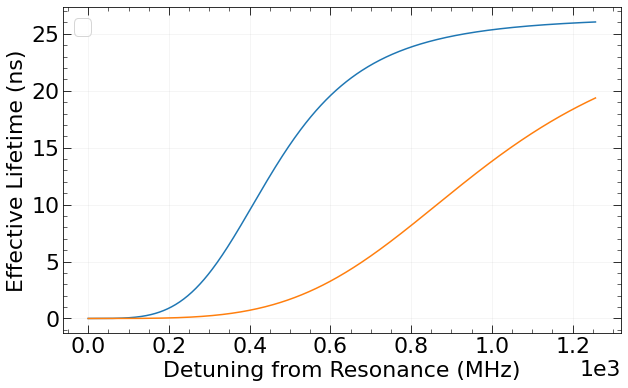

In [99]:
delta_nu_range = np.linspace(0,2*np.pi*200e6, 500)

# Calculate effective lifetime for each detuning
tau_eff_values = [effective_lifetime(mu, 1.3*I_0, delta_nu, Gamma_0) for delta_nu in delta_nu_range]
tau_eff_values_scaled = [effective_lifetime(mu, 1.3*I_0, delta_nu, Gamma_0,alpha=0.05) for delta_nu in delta_nu_range]
tau_eff_values_sat = [effective_lifetime_satint(mu, 1.3*I_0, delta_nu, Gamma_0,alpha=1) for delta_nu in delta_nu_range]

# Plot the effective lifetime as a function of detuning
plt.figure(figsize=(10, 6))
plt.plot(delta_nu_range*1e-6, np.array(tau_eff_values)*1e9)
plt.plot(delta_nu_range*1e-6, np.array(tau_eff_values_scaled)*1e9)
plt.plot(delta_nu_range*1e-6, np.array(tau_eff_values_sat)*1e9)

# plt.axvline(x=0, color='r', linestyle='--', label='Resonance Frequency')
plt.xlabel('Detuning from Resonance (MHz)')
plt.ylabel('Effective Lifetime (ns)')
# plt.title('Effective Lifetime as a Function of Detuning')
plt.legend()
plt.grid(True)

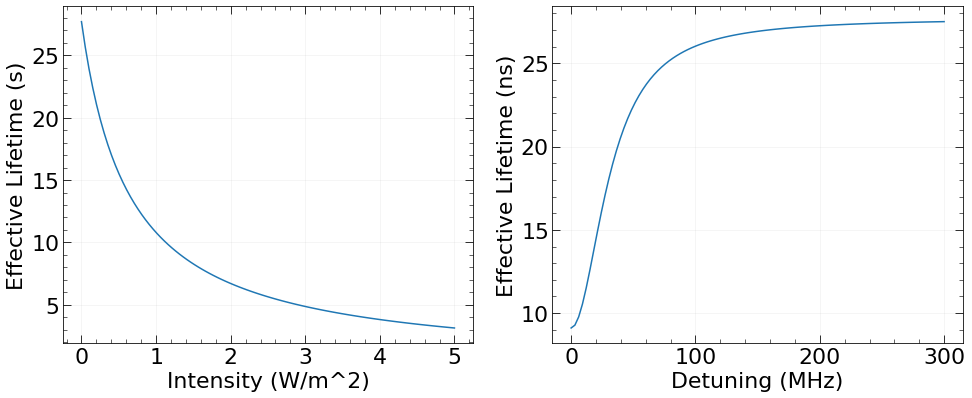

In [156]:
import numpy as np
import matplotlib.pyplot as plt

def effective_lifetime_sat(I, delta_nu, mu, hbar, c, epsilon_0, Gamma,alpha=1):
    # Define the constant A
    A = alpha*(mu**2 / hbar**2) * (2*np.pi / (3*c * epsilon_0))
    
    # Calculate tau_eff
    tau_eff = 1 / (Gamma * (1 + (A * I) / (Gamma**2 + 4 * delta_nu**2)))
    
    return tau_eff

# Constants (example values, replace with actual values)
mu = cs.muD1 # Transition dipole moment in appropriate units
hbar = 1.0545718e-34  # Reduced Planck's constant in J·s
c = 3.0e8  # Speed of light in m/s
epsilon_0 = 8.854187817e-12  # Vacuum permittivity in F/m
Gamma = cs.Rb87_D1Gamma  # Natural linewidth in s^-1

I_values = np.linspace(0, 5*cs.IsatD1, 100)  # Example intensity range in W/m^2
delta_nu_values = np.linspace(0, 300e6, 100)  # Example detuning range in Hz

# Calculate tau_eff as a function of intensity for a fixed detuning
fixed_delta_nu = 1e6  # Fixed detuning in Hz
tau_eff_intensity = [effective_lifetime_sat(I, fixed_delta_nu, mu, hbar, c, epsilon_0, Gamma) for I in I_values]

# Calculate tau_eff as a function of detuning for a fixed intensity
fixed_I = 1.3*cs.IsatD1  # Fixed intensity in W/m^2
tau_eff_detuning = [effective_lifetime_sat(fixed_I, delta_nu, mu, hbar, c, epsilon_0, Gamma,alpha=1) for delta_nu in delta_nu_values]

# Plotting the results
plt.figure(figsize=(14, 6))

# Plot of lifetime vs intensity
plt.subplot(1, 2, 1)
plt.plot(I_values/cs.IsatD1, np.array(tau_eff_intensity)*1e9)
plt.xlabel('Intensity (W/m^2)')
plt.ylabel('Effective Lifetime (s)')
# plt.title(f'Effective Lifetime vs Intensity (Fixed Detuning = {fixed_delta_nu} Hz)')

# Plot of lifetime vs detuning
plt.subplot(1, 2, 2)
plt.plot(delta_nu_values*1e-6, np.array(tau_eff_detuning)*1e9)
plt.xlabel('Detuning (MHz)')
plt.ylabel('Effective Lifetime (ns)')
# plt.title(f'Effective Lifetime vs Detuning (Fixed Intensity = {fixed_I} W/m^2)')

plt.tight_layout()

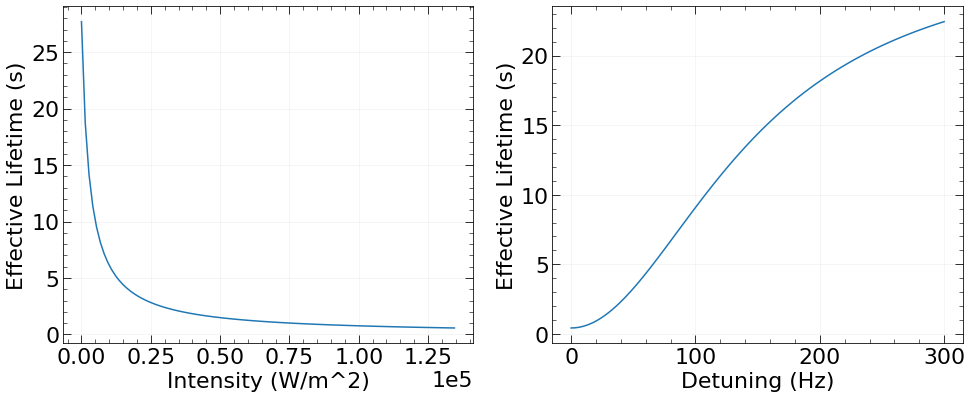

In [191]:
import numpy as np
import matplotlib.pyplot as plt

def effective_lifetime_sat2(mu,I_0, I_sat, delta, Gamma_0,alpha=1):
    # Define the constant A
    A = (np.pi*mu**2) / (3*c*cs.hbar**2*cs.epsilon0) 
    I_w = I_0/np.pi*((Gamma_0/2)/((delta)**2+(Gamma_0/2)**2))
    Gamma_stim = alpha*A*(I_w/(1+I_w/I_sat))     
    Gamma_eff = Gamma_0 + Gamma_stim
    tau_eff = 1 / Gamma_eff
    
    return tau_eff


I_values = np.linspace(0, 3000*cs.IsatD1, 100)  # Example intensity range in W/m^2
delta_nu_values = np.linspace(0, 300e6, 100)  # Example detuning range in Hz

# Calculate tau_eff as a function of intensity for a fixed detuning
fixed_delta_nu = 100e6  # Fixed detuning in Hz
tau_eff_intensity = [effective_lifetime_sat2(cs.muD1,I,cs.IsatD1, fixed_delta_nu, cs.Rb87_D1Gamma) for I in I_values]

# Calculate tau_eff as a function of detuning for a fixed intensity
fixed_I = 1.3*cs.IsatD1  # Fixed intensity in W/m^2
tau_eff_detuning = [effective_lifetime_sat2(cs.muD1,1.3*cs.IsatD1,cs.IsatD1, delta, cs.Rb87_D1Gamma,alpha=100) for delta in delta_nu_values]

# Plotting the results
plt.figure(figsize=(14, 6))

# Plot of lifetime vs intensity
plt.subplot(1, 2, 1)
plt.plot(I_values, np.array(tau_eff_intensity)*1e9)
plt.xlabel('Intensity (W/m^2)')
plt.ylabel('Effective Lifetime (s)')
# plt.title(f'Effective Lifetime vs Intensity (Fixed Detuning = {fixed_delta_nu} Hz)')

# Plot of lifetime vs detuning
plt.subplot(1, 2, 2)
plt.plot(delta_nu_values*1e-6, np.array(tau_eff_detuning)*1e9)
plt.xlabel('Detuning (Hz)')
plt.ylabel('Effective Lifetime (s)')
# plt.title(f'Effective Lifetime vs Detuning (Fixed Intensity = {fixed_I} W/m^2)')

plt.tight_layout()

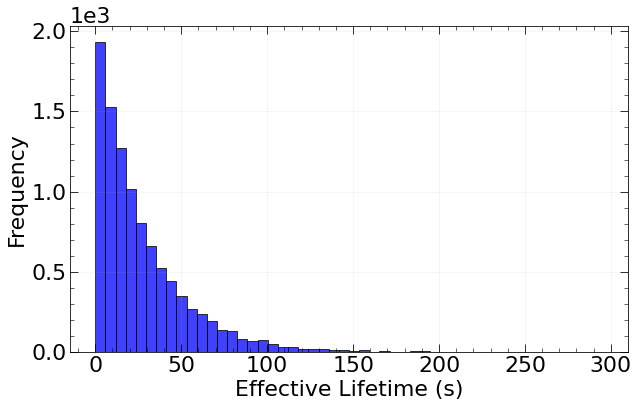

In [190]:
import numpy as np
import matplotlib.pyplot as plt

# Speed of light in m/s
c = cs.c

def effective_lifetime(mu,I_0, I_sat, delta, Gamma_0,alpha=1):
    # Define the constant A
    A = (np.pi*mu**2) / (3*c*cs.hbar**2*cs.epsilon0) 
    I_w = I_0/np.pi*((Gamma_0/2)/((delta)**2+(Gamma_0/2)**2))
    Gamma_stim = alpha*A*(I_w/(1+I_w/I_sat))     
    Gamma_eff = Gamma_0 + Gamma_stim
    tau_eff = 1 / Gamma_eff
    
    return tau_eff

# Example values
mu = cs.muD1  # Dipole moment in C*m
I_0 = 1.3 * cs.IsatD1  # Intensity in W/m^2
I_sat = cs.IsatD1  # Saturation intensity in W/m^2
Gamma_0 = cs.Rb87_D1Gamma # Natural linewidth in Hz
delta = 500e6  # Single detuning value in Hz
num_samples = 10000  # Number of samples for the histogram

# Calculate effective lifetime for the given detuning value
tau_eff = effective_lifetime(mu, I_0, I_sat, delta, Gamma_0)

# Generate random values from exponential distribution with tau_eff as the mean
rng = np.random.default_rng()
tau_eff_rand_values = rng.exponential(tau_eff, size=num_samples)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(tau_eff_rand_values*1e9, bins=50, alpha=0.75, color='blue', edgecolor='black')
plt.xlabel('Effective Lifetime (s)')
plt.ylabel('Frequency')
# plt.title(f'Histogram of Random Effective Lifetime for Detuning = {delta/1e6} MHz')
plt.grid(True)
plt.show()


In [183]:
tau_eff

2.99891996250362e-60